In [1]:
from data_prep import DataPrep
from feature_predictions import FeaturePredictionMethods

import pandas as pd
import numpy as np

data initialized


/Users/pengjin/Desktop/ml_project/data_prep.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stock_data['ret_exc_lead1m_std'] = pd.DataFrame(scaler.fit_transform(self.stock_data[['ret_exc_lead1m']]))


data construction complete
DataFrame size: (49582, 138)


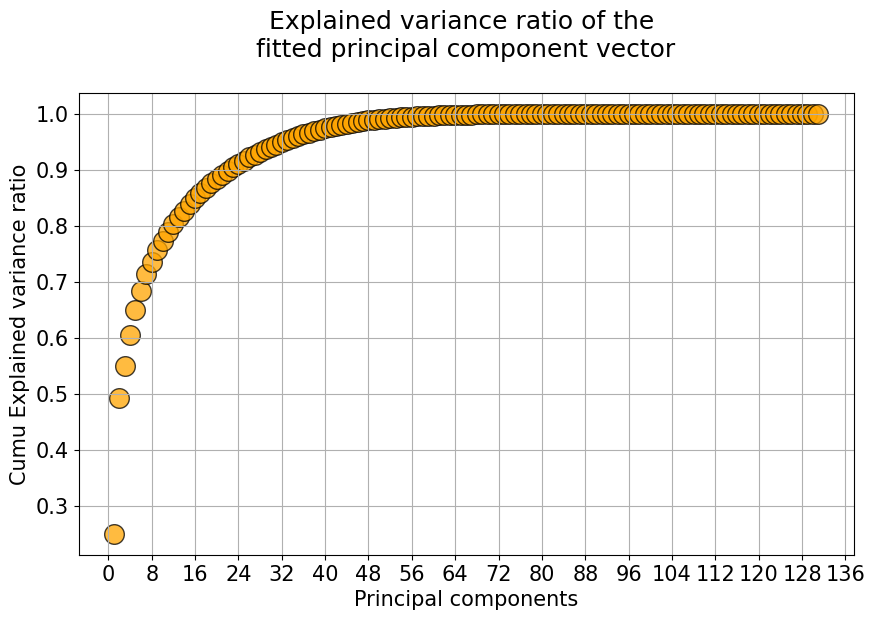

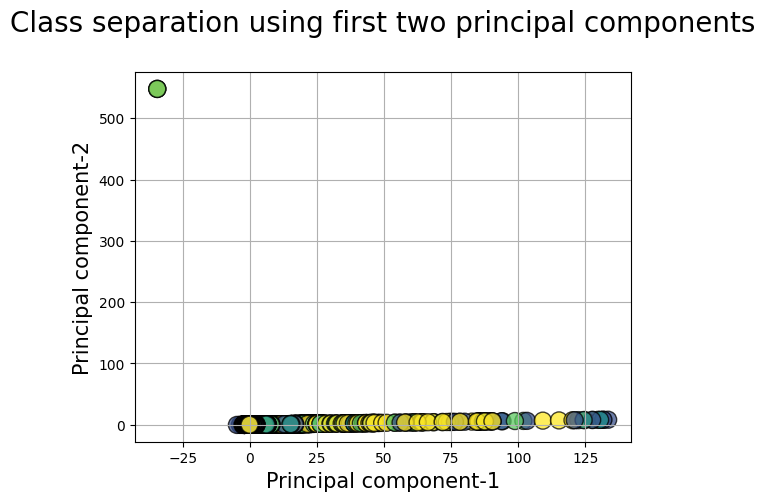

DataFrame size: (49582, 138)


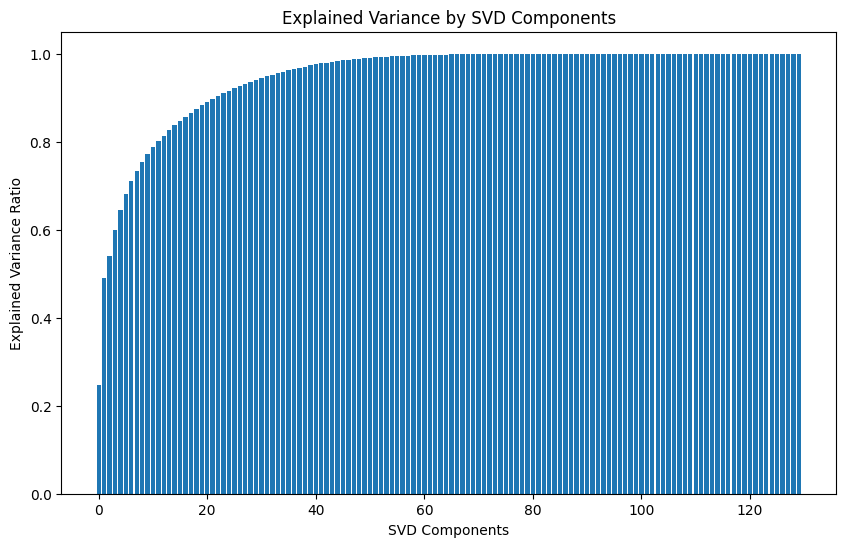

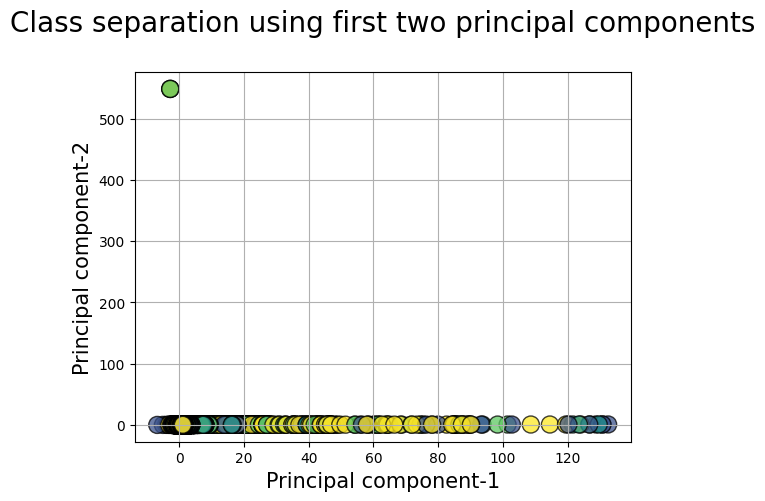

In [2]:
dr_obj = FeaturePredictionMethods()
dr_obj.data_initialization()
dr_obj.data_construction()

pca_reduced_df = dr_obj.pca_fit()
svd_reduced_df = dr_obj.svd_fit()

DataFrame size: (49582, 138)
              precision    recall  f1-score   support

           2       0.25      0.63      0.35       124
           3       0.29      0.17      0.21       132
           4       0.40      0.18      0.24       153
           5       0.26      0.15      0.19       119

    accuracy                           0.27       528
   macro avg       0.30      0.28      0.25       528
weighted avg       0.31      0.27      0.25       528



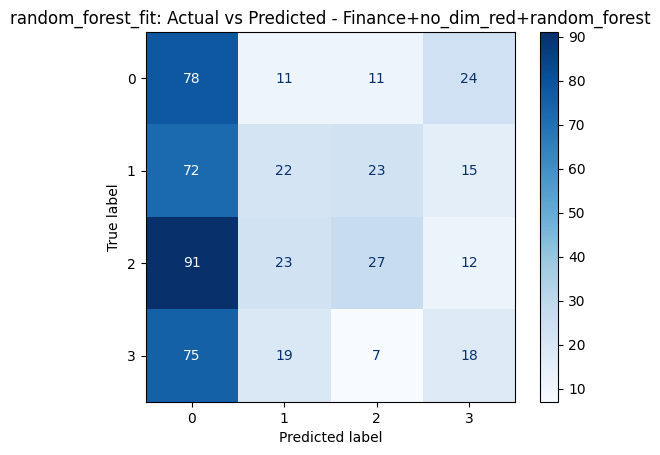

              precision    recall  f1-score   support

           2       0.17      0.34      0.23       124
           3       0.23      0.20      0.22       132
           4       0.22      0.08      0.12       153
           5       0.31      0.29      0.30       119

    accuracy                           0.22       528
   macro avg       0.24      0.23      0.22       528
weighted avg       0.23      0.22      0.21       528



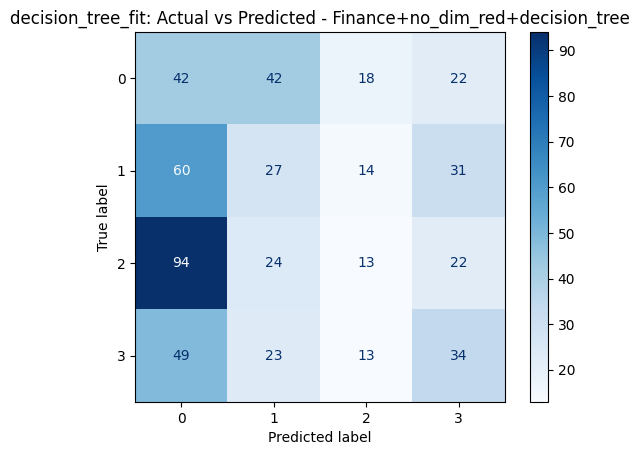

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


MSE: 0.01720173931930913


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


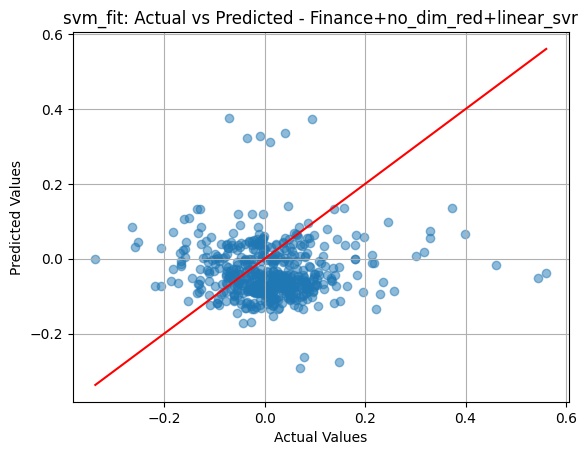

MSE: 0.09638622484628435


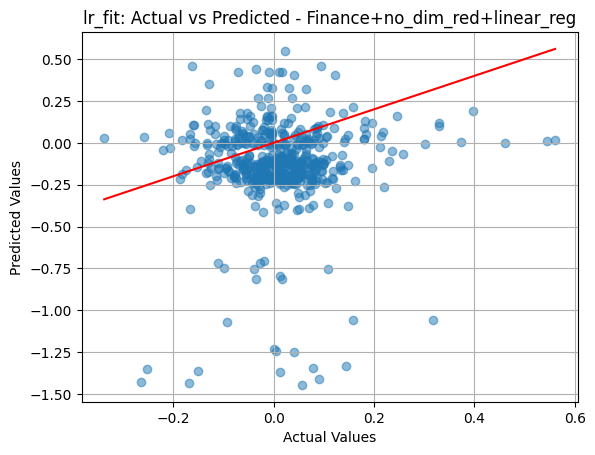

MSE: 0.009402009231268271


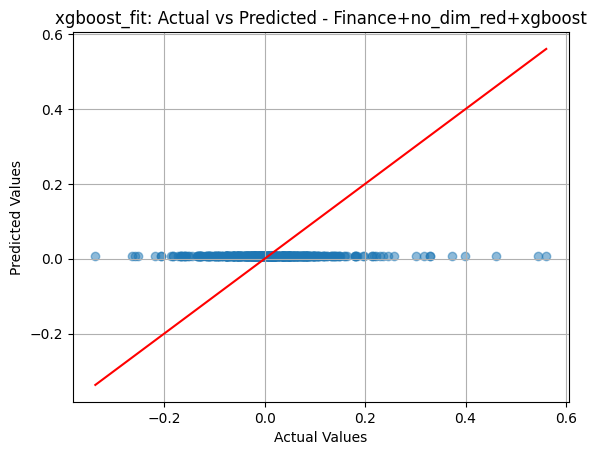

In [3]:
# No Dim Reduction 
stock_data = dr_obj.stock_data.copy()
stock_data = dr_obj.data_clean_na(df=stock_data)
stock_data = dr_obj.generate_ret_class(df=stock_data, n=4)

sectors = list(dr_obj.stock_data['sector'].unique())+['all']
x_labels = [i for i in stock_data.columns if i not in (dr_obj.id_columns+dr_obj.ret_col+['ret_class', 'index'])]
for sector in sectors:
    if sector == 'all':
        sub_stock_data = stock_data
    else:
        sub_stock_data = stock_data.loc[stock_data.sector==sector]
    try:
        sub_stock_df_x = sub_stock_data[x_labels]
        sub_stock_df_y_dis = sub_stock_data['ret_class']
        sub_stock_df_y_cont = sub_stock_data['ret_exc_lead1m']
        dr_obj.random_forest_fit(x_data=sub_stock_df_x, y_data=sub_stock_df_y_dis, title_suffix=f'{sector}+no_dim_red+random_forest')
        dr_obj.decision_tree_fit(x_data=sub_stock_df_x, y_data=sub_stock_df_y_dis, title_suffix=f'{sector}+no_dim_red+decision_tree')
        dr_obj.svm_fit(x_data=sub_stock_df_x, y_data=sub_stock_df_y_cont, title_suffix=f'{sector}+no_dim_red+linear_svr')
        dr_obj.lr_fit(x_data=sub_stock_df_x, y_data=sub_stock_df_y_cont, title_suffix=f'{sector}+no_dim_red+linear_reg')
        dr_obj.xgboost_fit(x_data=sub_stock_df_x, y_data=sub_stock_df_y_cont, title_suffix=f'{sector}+no_dim_red+xgboost')
    except Exception as e:
        print(e)


              precision    recall  f1-score   support

           2       0.49      0.58      0.53       818
           3       0.49      0.41      0.44       817

    accuracy                           0.49      1635
   macro avg       0.49      0.49      0.49      1635
weighted avg       0.49      0.49      0.49      1635



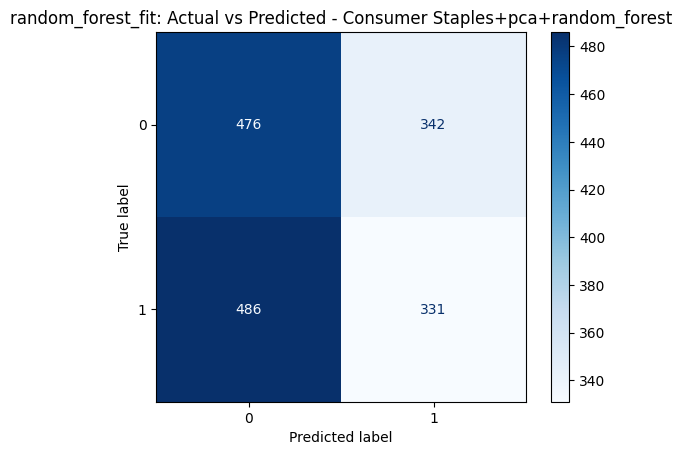

              precision    recall  f1-score   support

           2       0.49      0.48      0.49       818
           3       0.49      0.51      0.50       817

    accuracy                           0.49      1635
   macro avg       0.49      0.49      0.49      1635
weighted avg       0.49      0.49      0.49      1635



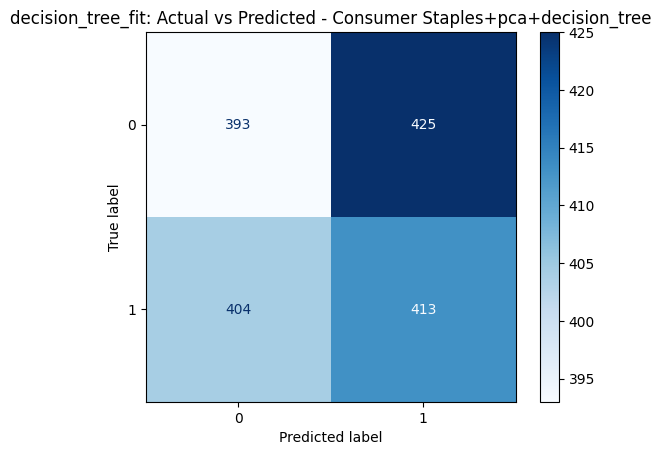

MSE: 0.008060293717796978


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


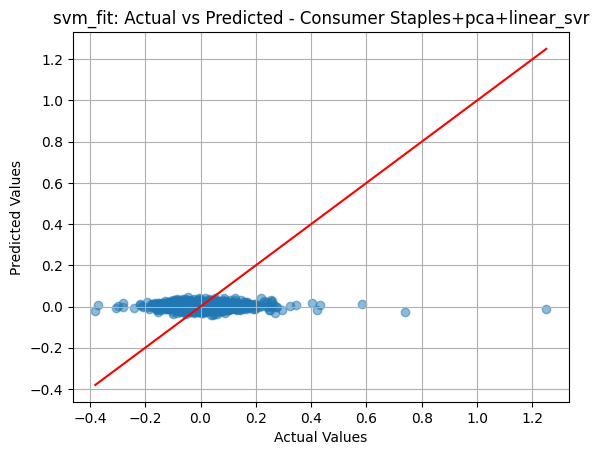

MSE: 0.007927469567370468


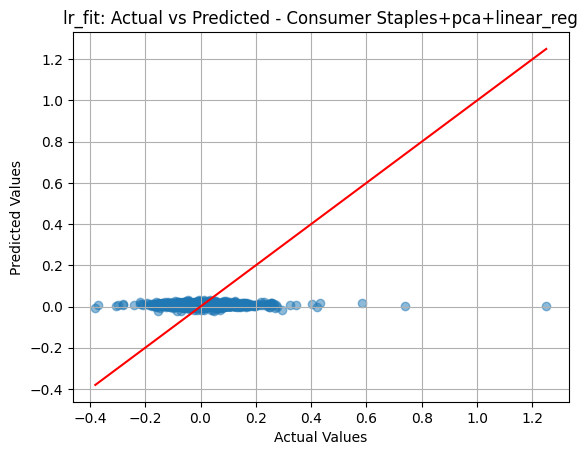

MSE: 0.007870242466433516


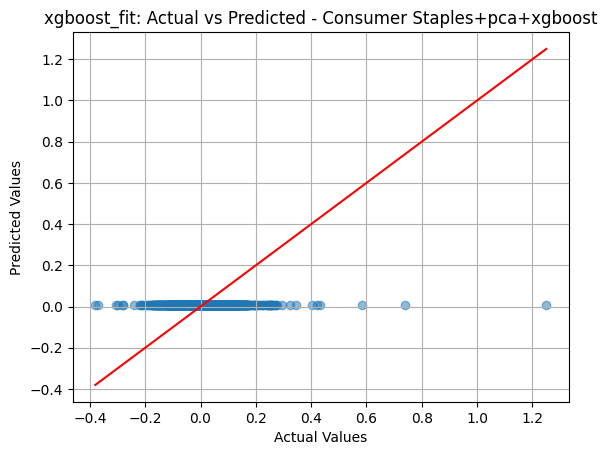

              precision    recall  f1-score   support

           2       0.53      0.51      0.52      2006
           3       0.49      0.50      0.49      1857

    accuracy                           0.51      3863
   macro avg       0.51      0.51      0.51      3863
weighted avg       0.51      0.51      0.51      3863



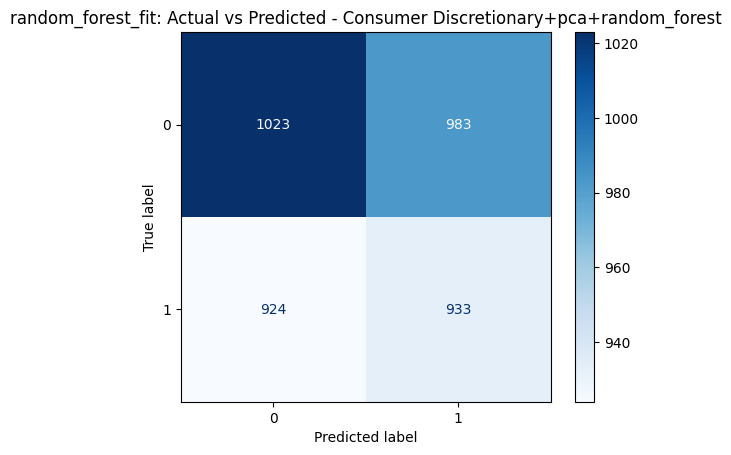

              precision    recall  f1-score   support

           2       0.52      0.45      0.48      2006
           3       0.48      0.56      0.52      1857

    accuracy                           0.50      3863
   macro avg       0.50      0.50      0.50      3863
weighted avg       0.50      0.50      0.50      3863



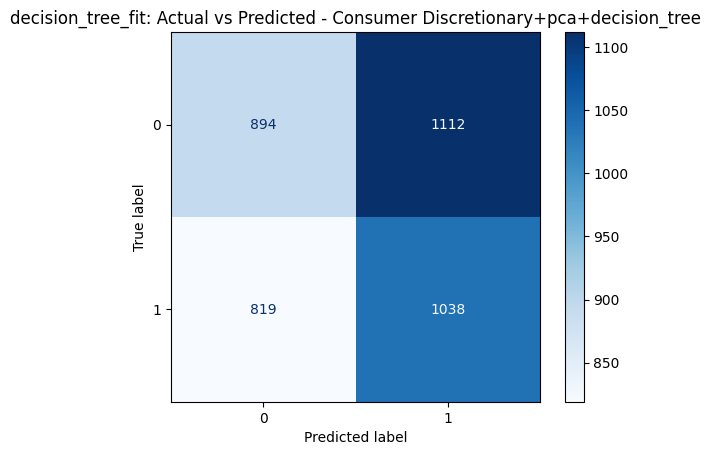

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


MSE: 0.014438171990098767


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


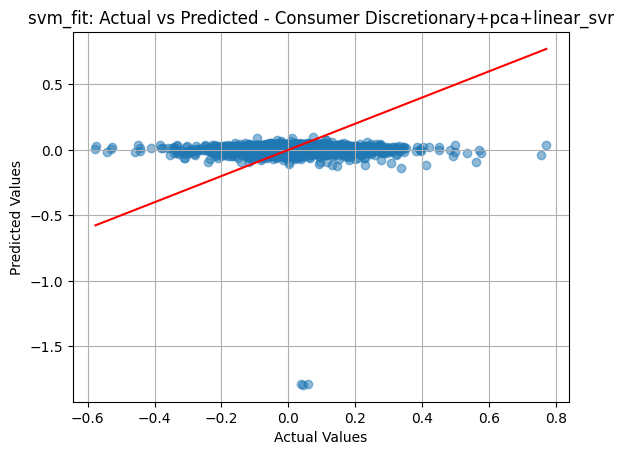

MSE: 0.024495237523910043


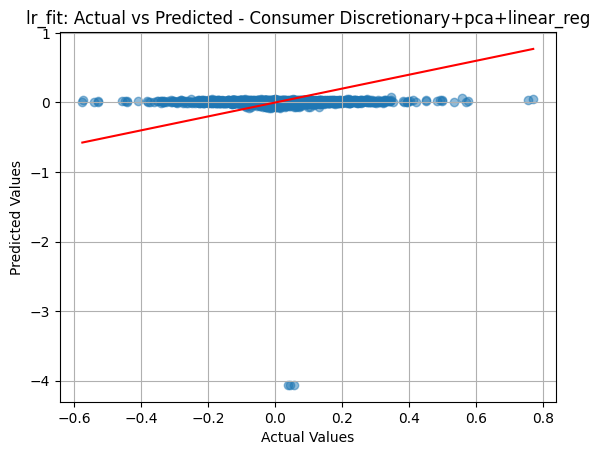

MSE: 0.011324365383504167


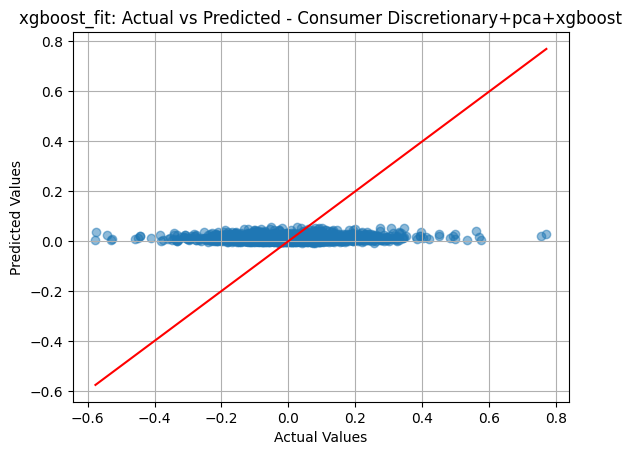

              precision    recall  f1-score   support

           2       0.54      0.54      0.54       855
           3       0.48      0.47      0.47       759

    accuracy                           0.51      1614
   macro avg       0.51      0.51      0.51      1614
weighted avg       0.51      0.51      0.51      1614



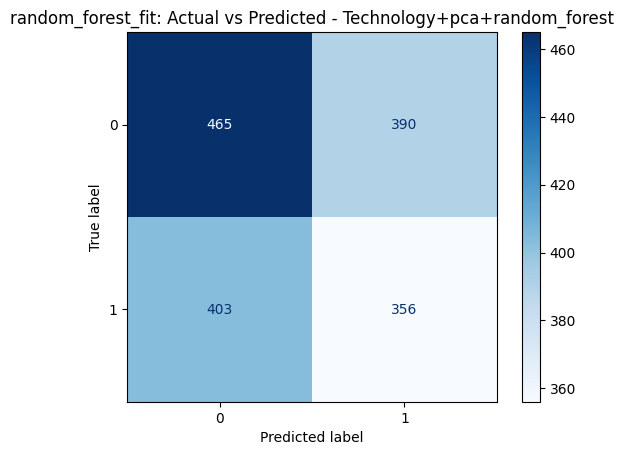

              precision    recall  f1-score   support

           2       0.54      0.55      0.54       855
           3       0.48      0.47      0.48       759

    accuracy                           0.51      1614
   macro avg       0.51      0.51      0.51      1614
weighted avg       0.51      0.51      0.51      1614



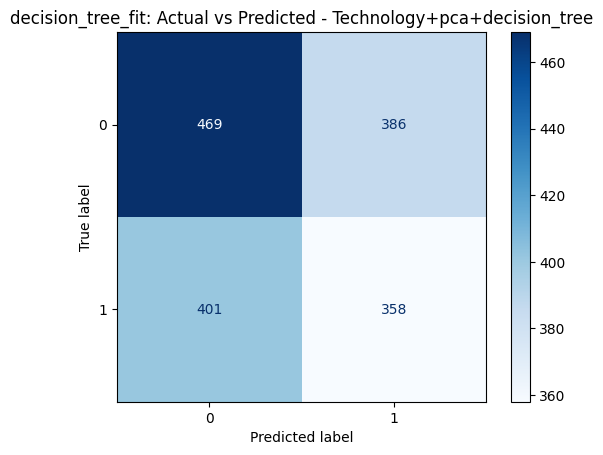

MSE: 0.012869333721878958


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


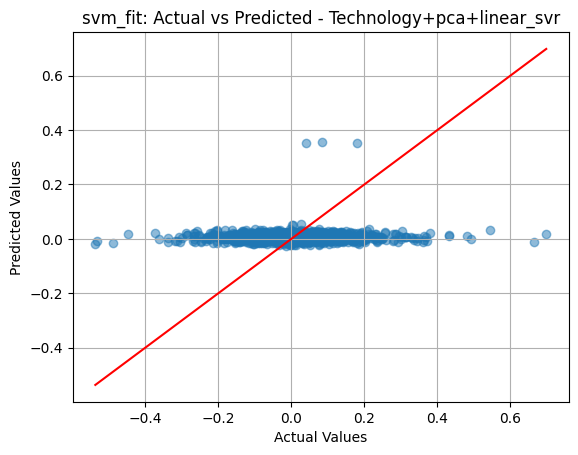

MSE: 0.013254479238237452


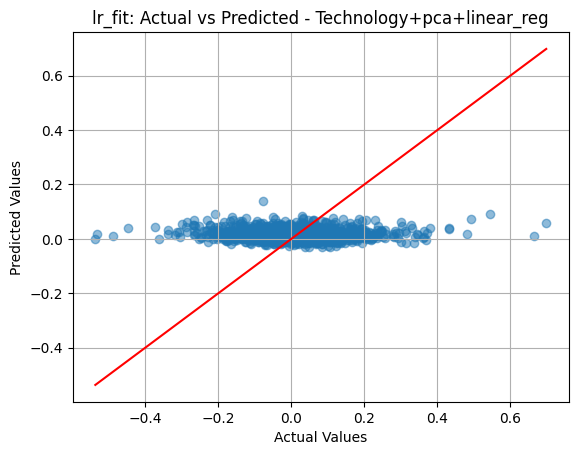

MSE: 0.012792458829696613


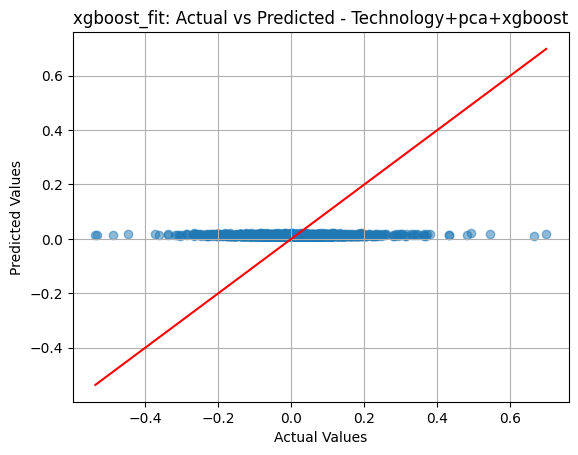

              precision    recall  f1-score   support

           2       0.49      0.73      0.59       256
           3       0.54      0.30      0.38       272

    accuracy                           0.51       528
   macro avg       0.51      0.51      0.49       528
weighted avg       0.52      0.51      0.48       528



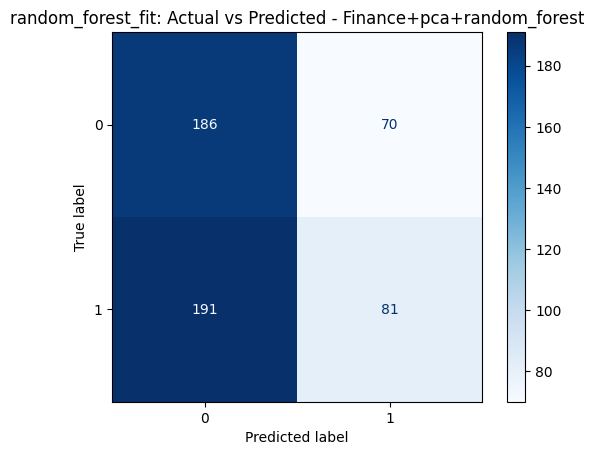

              precision    recall  f1-score   support

           2       0.51      0.55      0.53       256
           3       0.55      0.51      0.53       272

    accuracy                           0.53       528
   macro avg       0.53      0.53      0.53       528
weighted avg       0.53      0.53      0.53       528



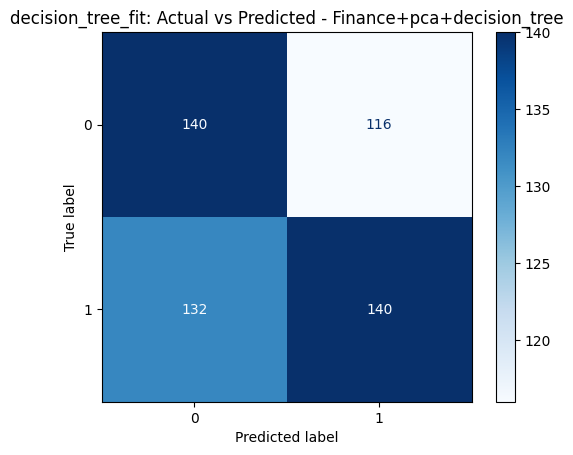

MSE: 0.010408286278155727


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


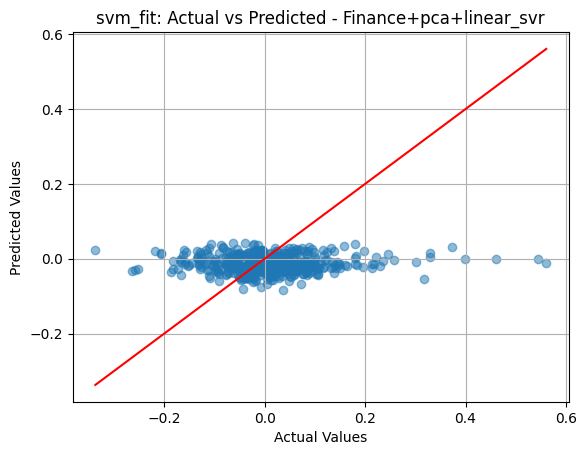

MSE: 0.0111832827935762


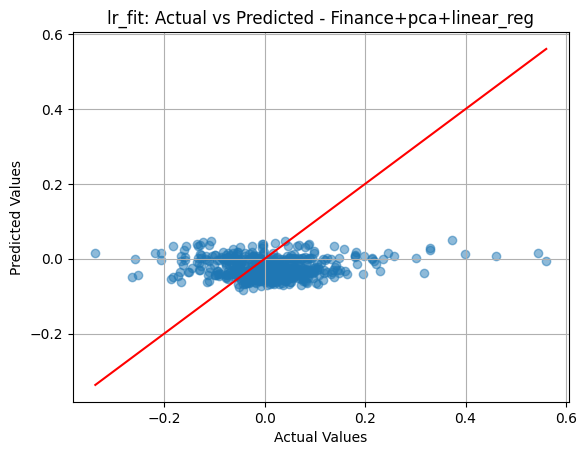

MSE: 0.009402009231268271


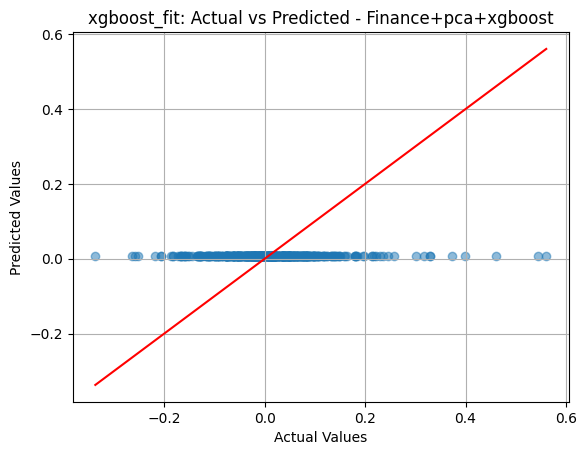

              precision    recall  f1-score   support

           2       0.51      0.58      0.54      1657
           3       0.55      0.48      0.51      1768

    accuracy                           0.53      3425
   macro avg       0.53      0.53      0.53      3425
weighted avg       0.53      0.53      0.53      3425



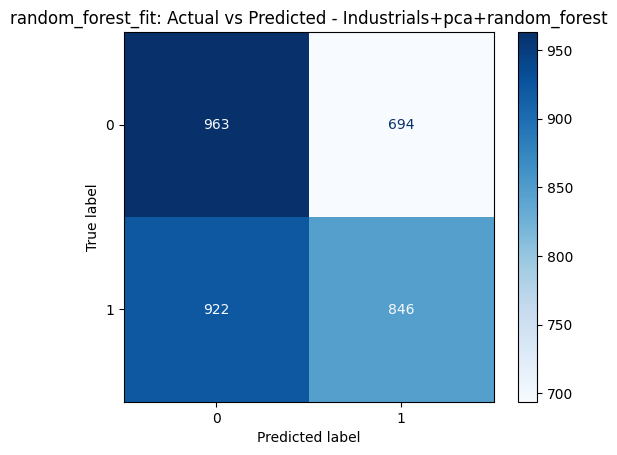

              precision    recall  f1-score   support

           2       0.48      0.50      0.49      1657
           3       0.52      0.50      0.51      1768

    accuracy                           0.50      3425
   macro avg       0.50      0.50      0.50      3425
weighted avg       0.50      0.50      0.50      3425



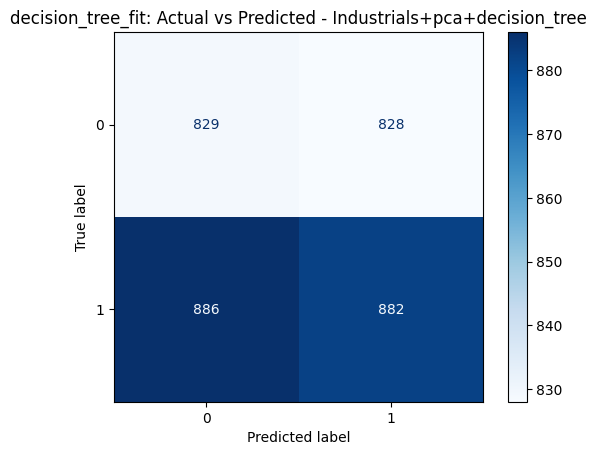

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


MSE: 0.00894088514671154


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


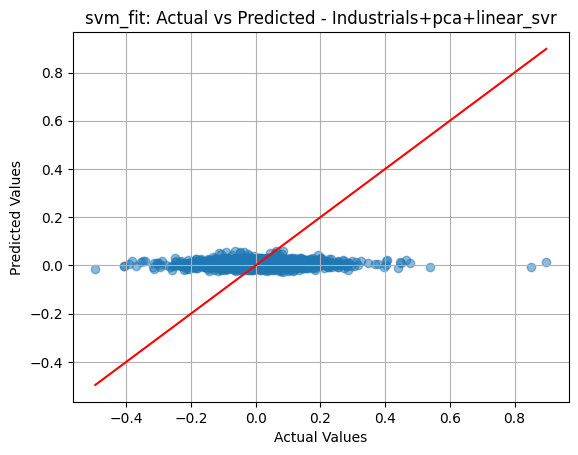

MSE: 0.008890383510740976


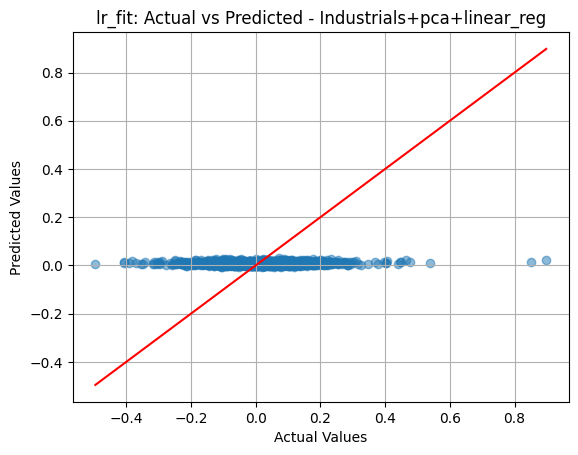

MSE: 0.008890921276643584


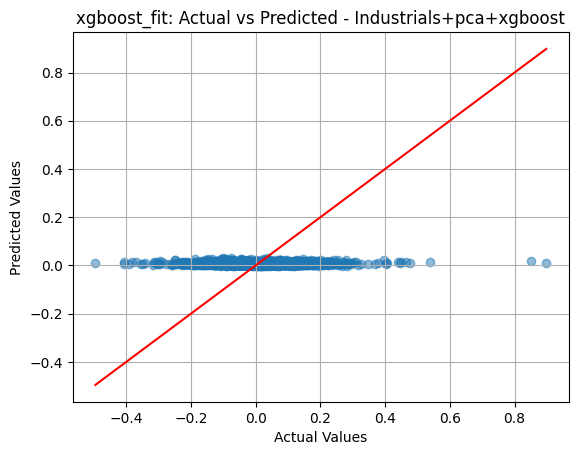

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.49      0.39      0.43       736
           3       0.52      0.62      0.56       780

    accuracy                           0.50      1517
   macro avg       0.33      0.33      0.33      1517
weighted avg       0.50      0.50      0.50      1517



/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

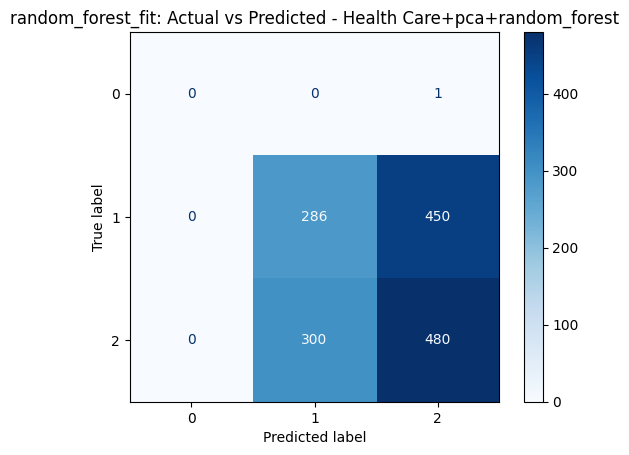

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.49      0.55      0.52       736
           3       0.52      0.47      0.49       780

    accuracy                           0.51      1517
   macro avg       0.34      0.34      0.34      1517
weighted avg       0.51      0.51      0.51      1517



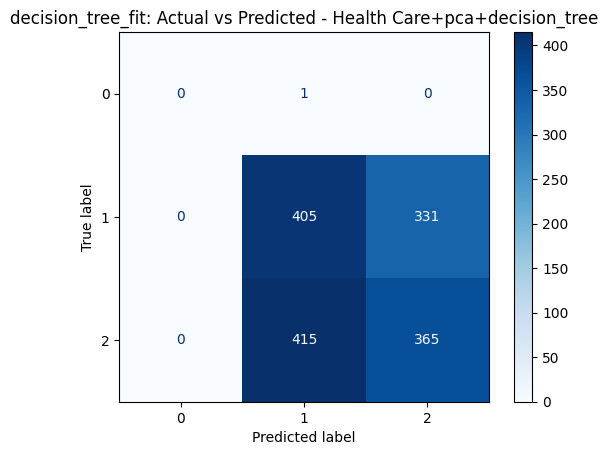

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MSE: 0.00903880479753677


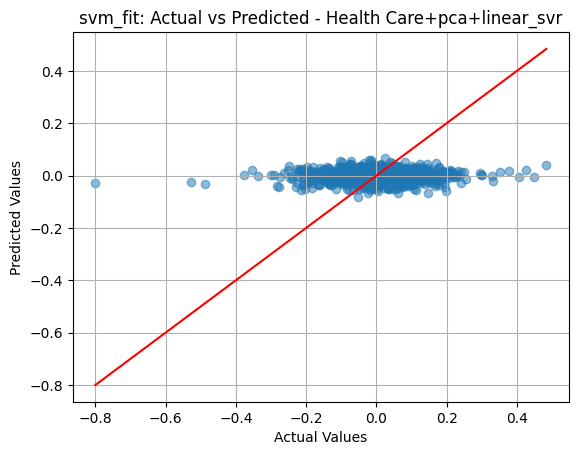

MSE: 0.00892901224072023


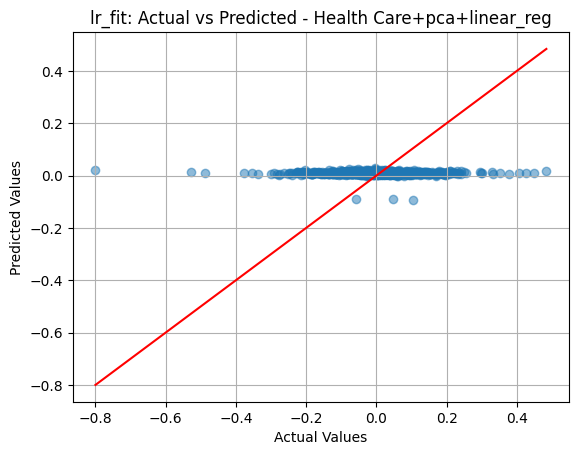

MSE: 0.008880242233090679


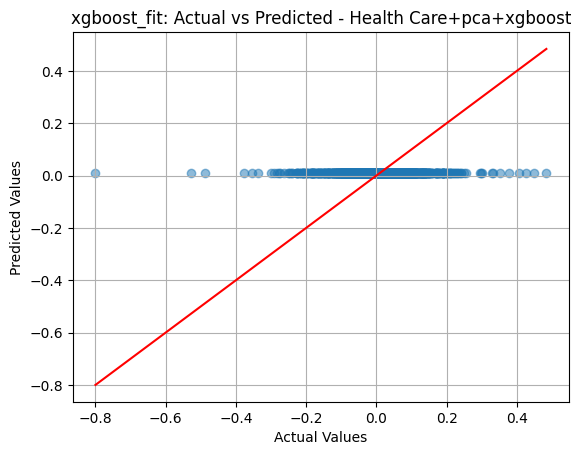

              precision    recall  f1-score   support

           2       0.54      0.38      0.44        40
           3       0.46      0.62      0.53        34

    accuracy                           0.49        74
   macro avg       0.50      0.50      0.48        74
weighted avg       0.50      0.49      0.48        74



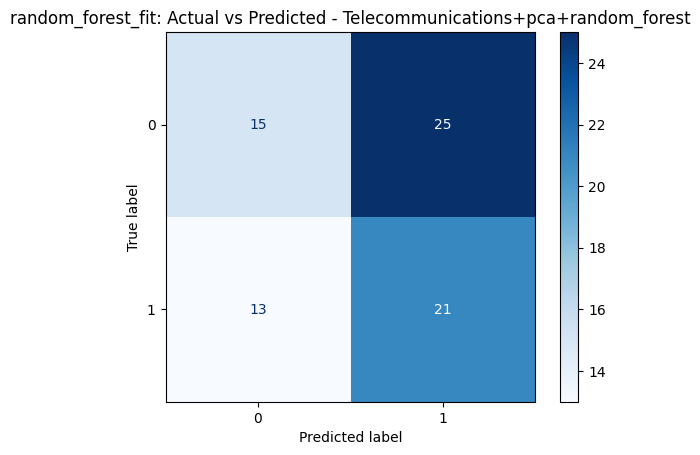

              precision    recall  f1-score   support

           2       0.66      0.53      0.58        40
           3       0.55      0.68      0.61        34

    accuracy                           0.59        74
   macro avg       0.60      0.60      0.59        74
weighted avg       0.61      0.59      0.59        74



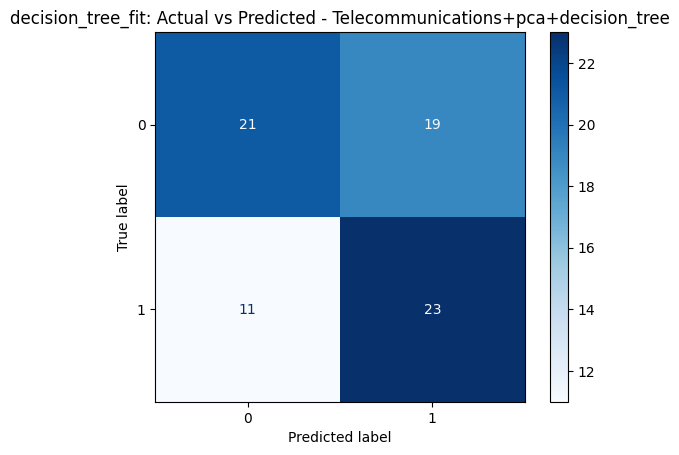

MSE: 0.009643455633970904


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


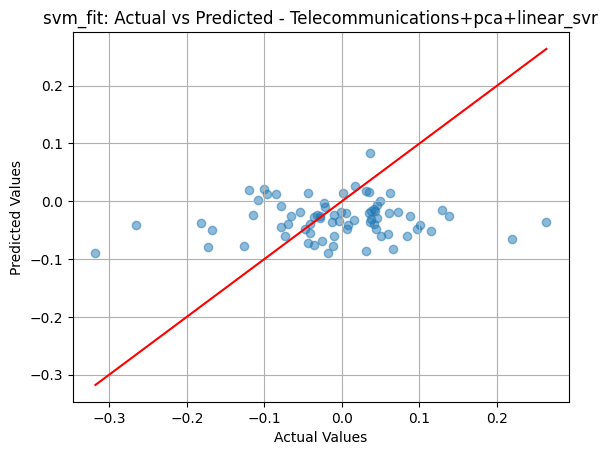

MSE: 0.009053642449626236


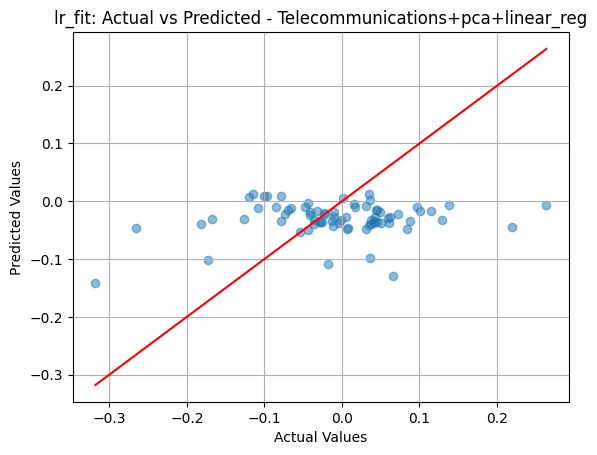

MSE: 0.00880543736148269


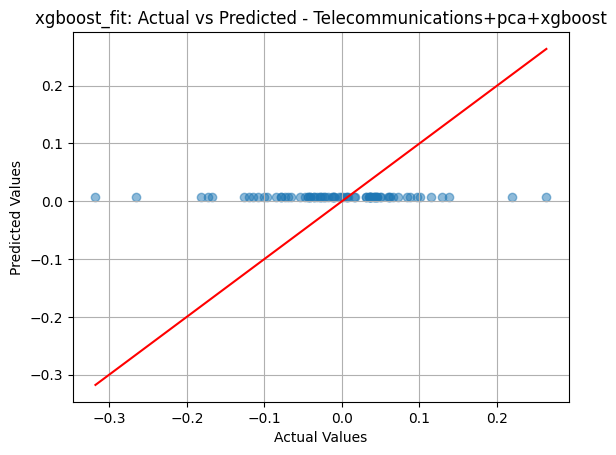

              precision    recall  f1-score   support

           2       0.49      0.51      0.50       119
           3       0.50      0.48      0.49       122

    accuracy                           0.50       241
   macro avg       0.50      0.50      0.50       241
weighted avg       0.50      0.50      0.50       241



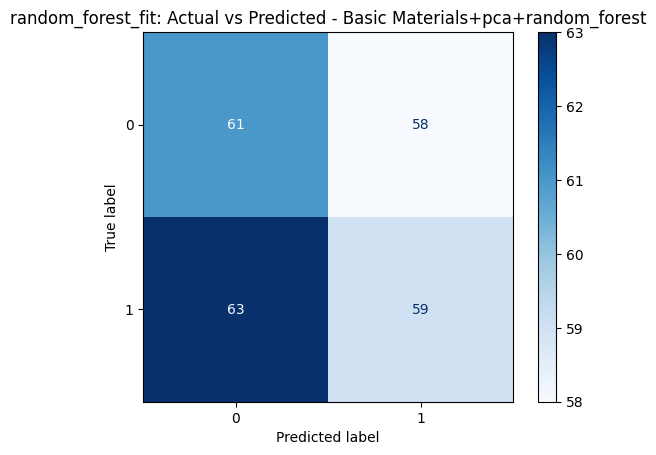

              precision    recall  f1-score   support

           2       0.51      0.78      0.61       119
           3       0.54      0.25      0.35       122

    accuracy                           0.51       241
   macro avg       0.52      0.52      0.48       241
weighted avg       0.52      0.51      0.48       241



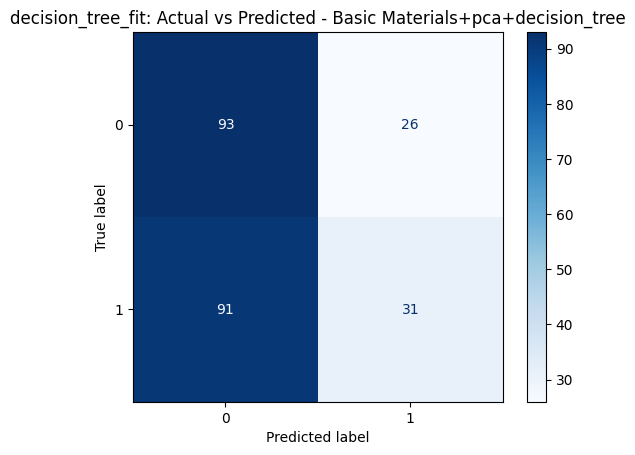

MSE: 0.014044583419283538


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


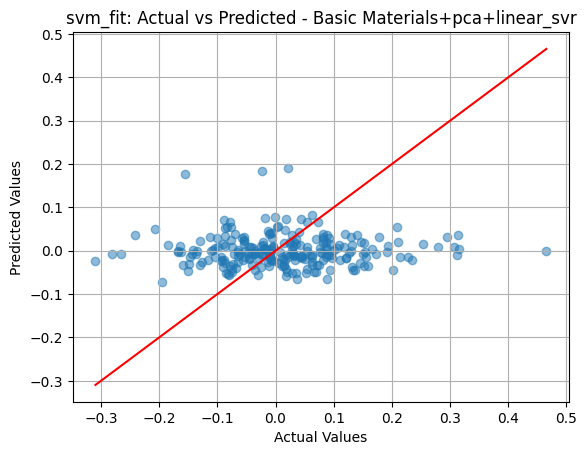

MSE: 0.01978243121061224


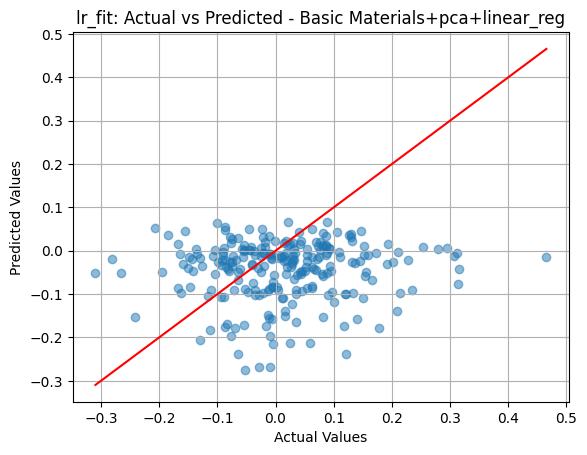

MSE: 0.012644822909101797


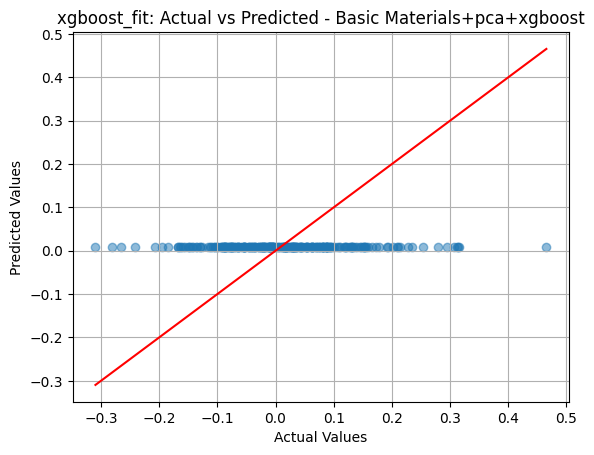

              precision    recall  f1-score   support

           2       0.49      0.58      0.53       514
           3       0.54      0.45      0.49       565

    accuracy                           0.51      1079
   macro avg       0.52      0.51      0.51      1079
weighted avg       0.52      0.51      0.51      1079



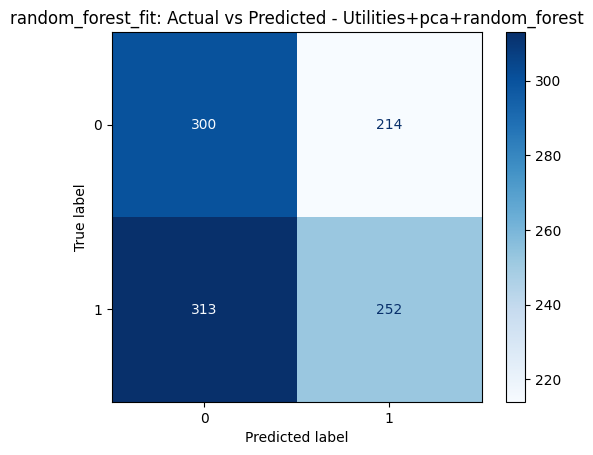

              precision    recall  f1-score   support

           2       0.47      0.51      0.49       514
           3       0.52      0.48      0.50       565

    accuracy                           0.49      1079
   macro avg       0.49      0.49      0.49      1079
weighted avg       0.49      0.49      0.49      1079



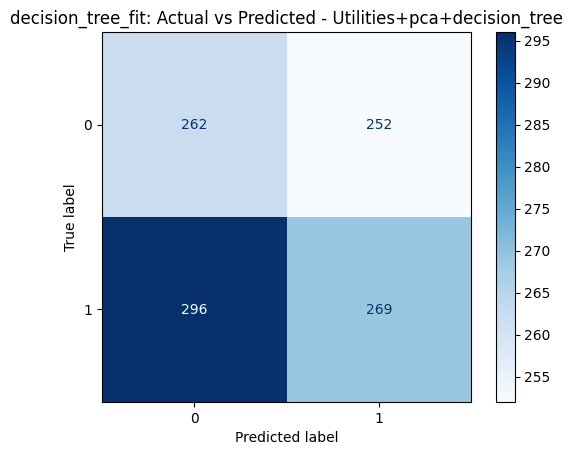

MSE: 0.003987710031810398


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


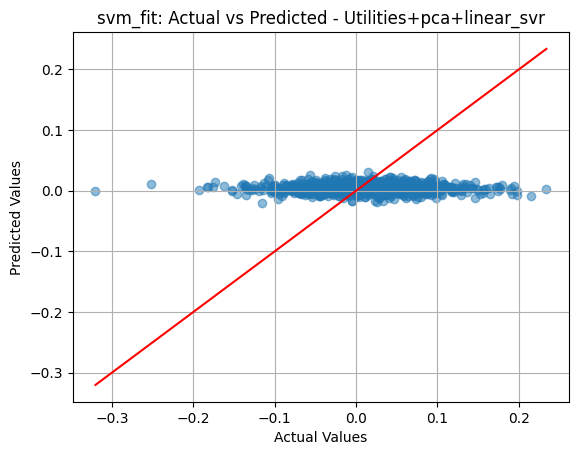

MSE: 0.003909097949488528


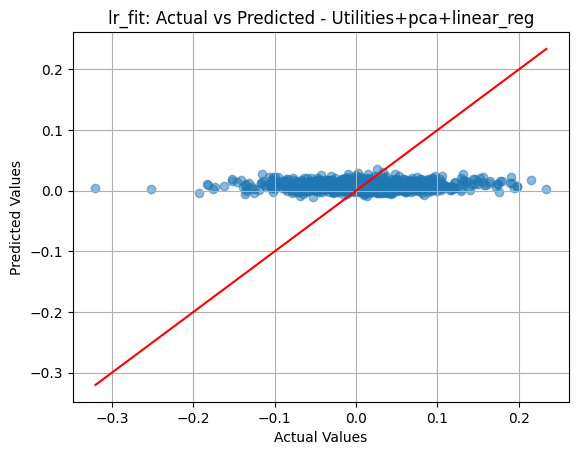

MSE: 0.0039005571759491583


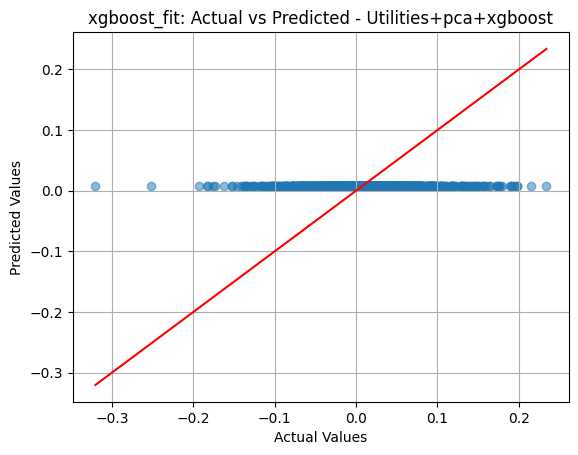

              precision    recall  f1-score   support

           2       0.18      0.12      0.14        26
           3       0.53      0.65      0.58        40

    accuracy                           0.44        66
   macro avg       0.35      0.38      0.36        66
weighted avg       0.39      0.44      0.41        66



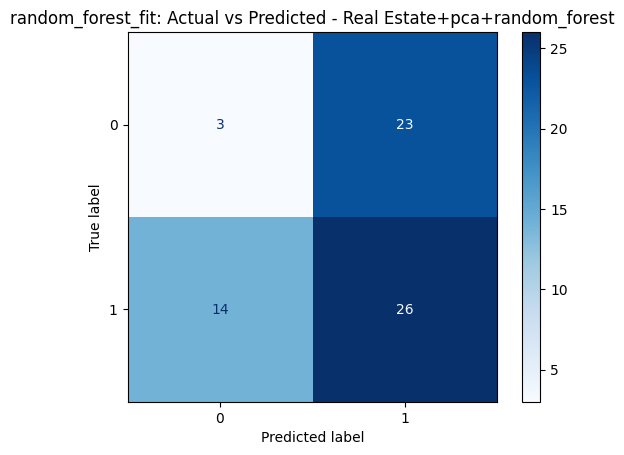

              precision    recall  f1-score   support

           2       0.37      0.42      0.39        26
           3       0.58      0.53      0.55        40

    accuracy                           0.48        66
   macro avg       0.47      0.47      0.47        66
weighted avg       0.50      0.48      0.49        66



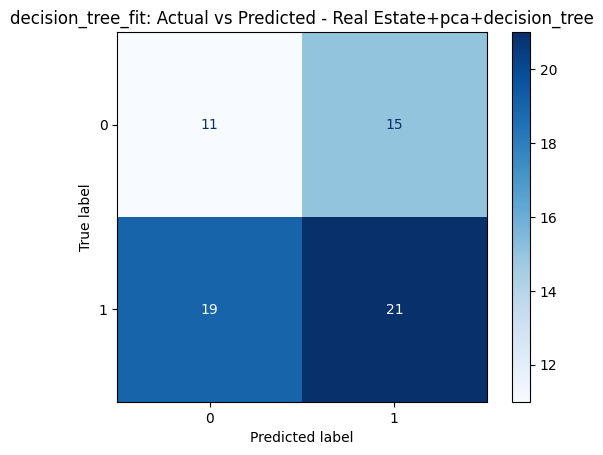

MSE: 0.007019542660082353


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


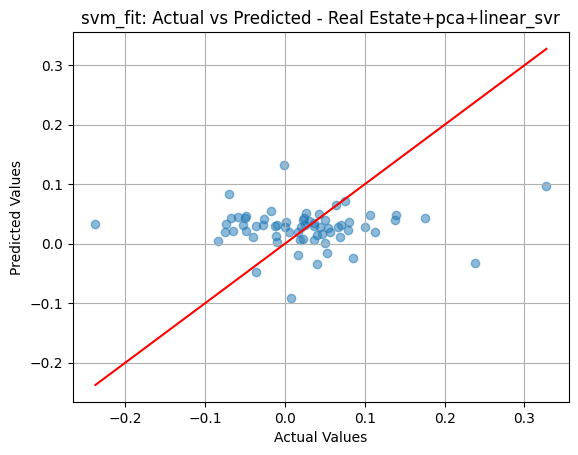

MSE: 0.011430712873036302


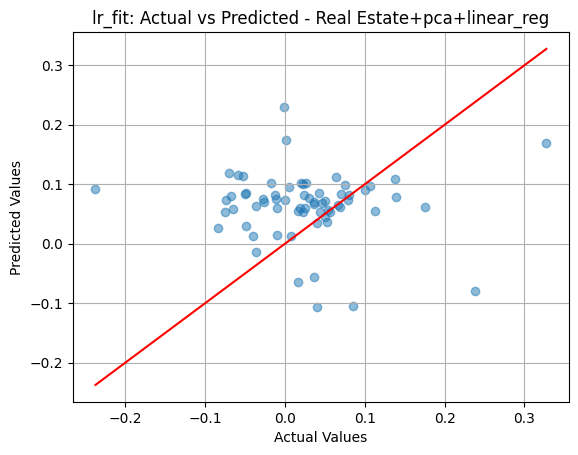

MSE: 0.006319814699911507


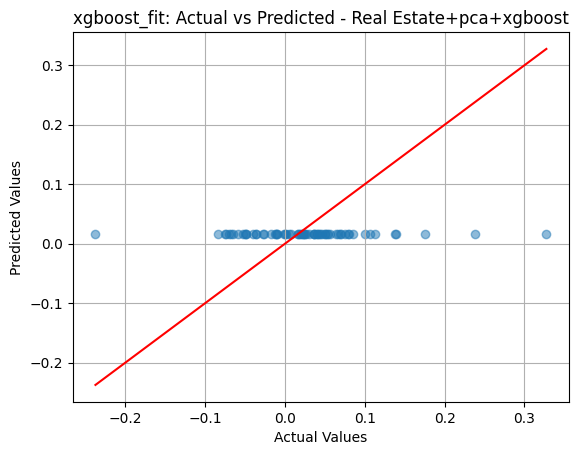

              precision    recall  f1-score   support

           2       0.50      0.49      0.50       410
           3       0.50      0.52      0.51       410

    accuracy                           0.50       820
   macro avg       0.50      0.50      0.50       820
weighted avg       0.50      0.50      0.50       820



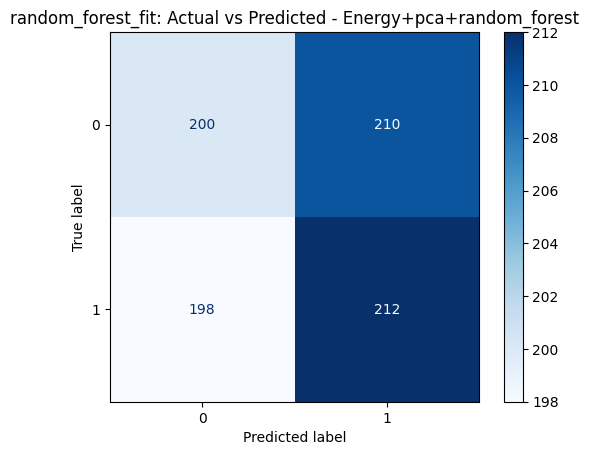

              precision    recall  f1-score   support

           2       0.50      0.43      0.46       410
           3       0.50      0.57      0.53       410

    accuracy                           0.50       820
   macro avg       0.50      0.50      0.50       820
weighted avg       0.50      0.50      0.50       820



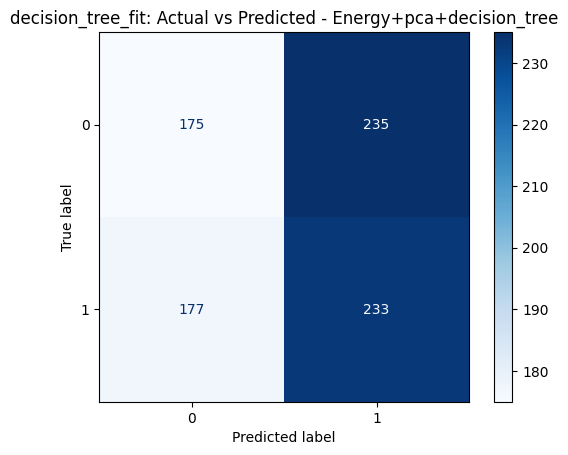

MSE: 0.013574630421072677


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


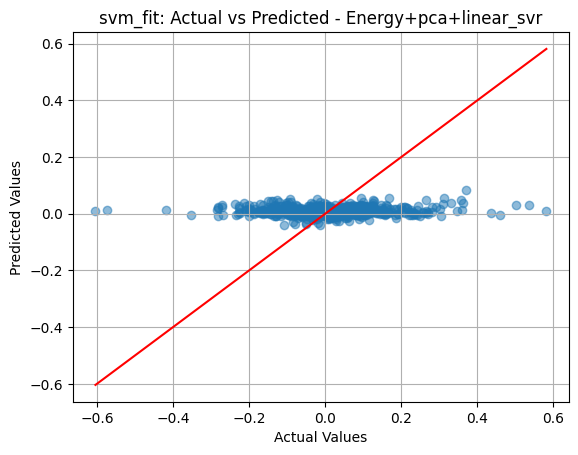

MSE: 0.013691834754629246


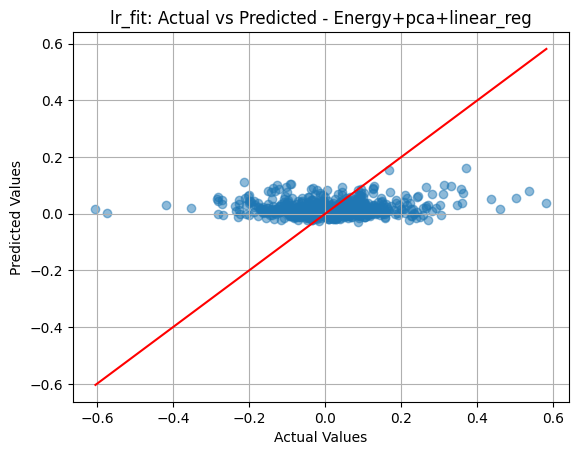

MSE: 0.013639067389168898


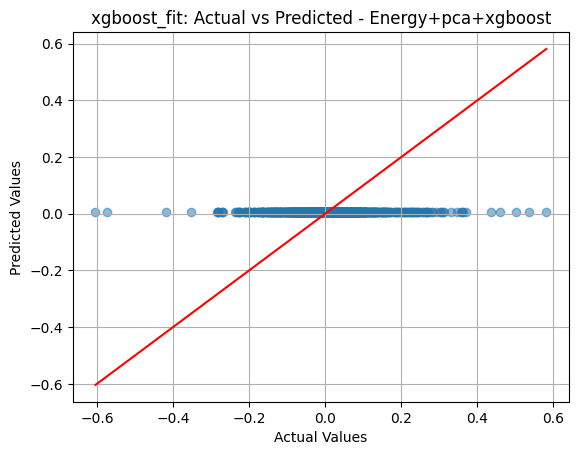

              precision    recall  f1-score   support

           2       0.71      0.50      0.59        10
           3       0.55      0.75      0.63         8

    accuracy                           0.61        18
   macro avg       0.63      0.62      0.61        18
weighted avg       0.64      0.61      0.61        18



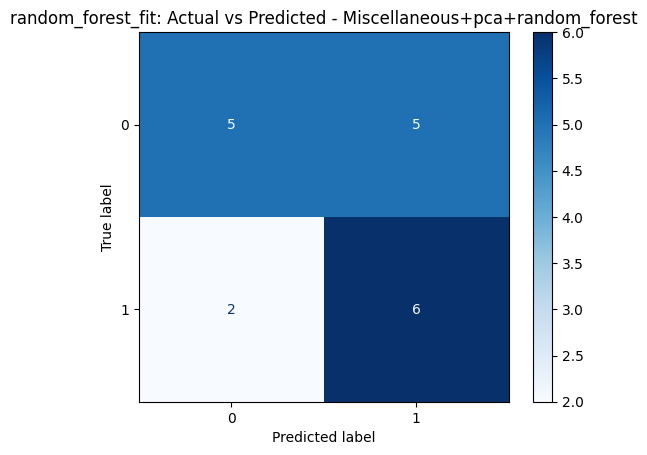

              precision    recall  f1-score   support

           2       0.67      0.20      0.31        10
           3       0.47      0.88      0.61         8

    accuracy                           0.50        18
   macro avg       0.57      0.54      0.46        18
weighted avg       0.58      0.50      0.44        18



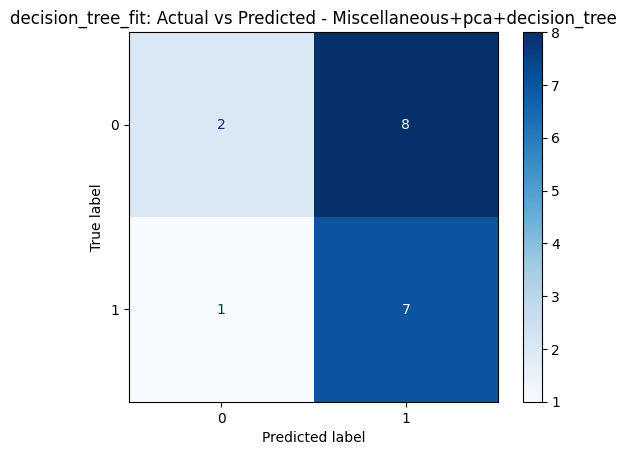

MSE: 0.15386515188860347


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


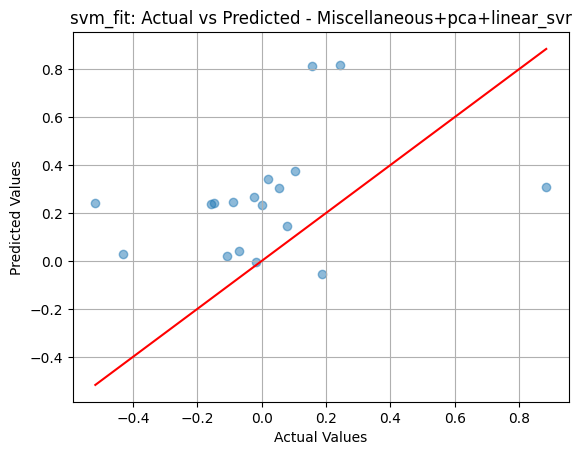

MSE: 0.17969799955876212


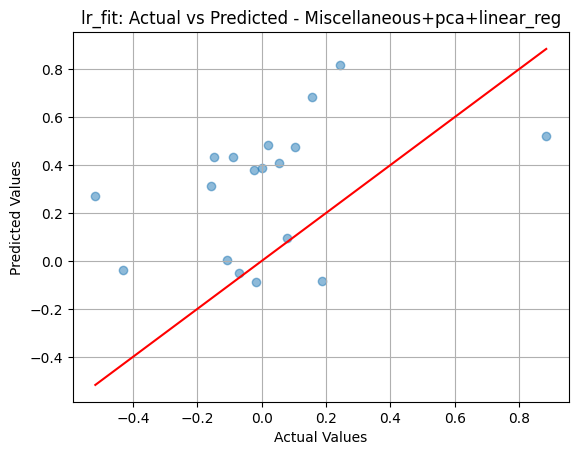

MSE: 0.08063328349802598


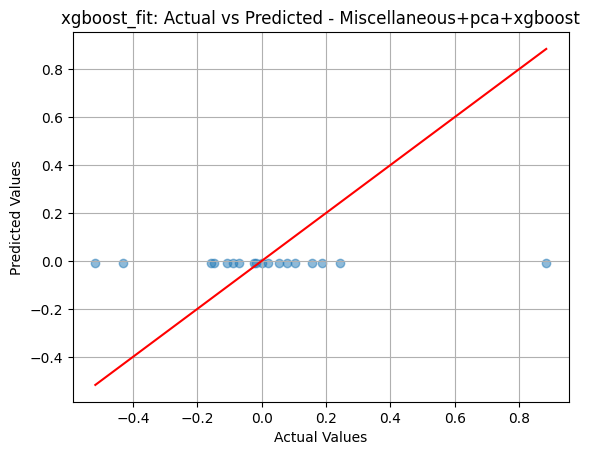

              precision    recall  f1-score   support

           2       0.51      0.55      0.53      7429
           3       0.51      0.47      0.49      7446

    accuracy                           0.51     14875
   macro avg       0.51      0.51      0.51     14875
weighted avg       0.51      0.51      0.51     14875



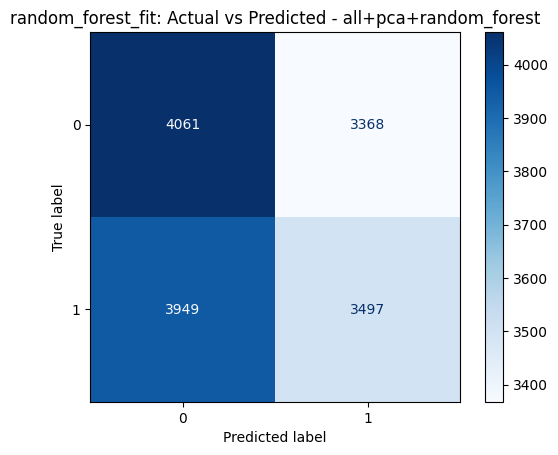

              precision    recall  f1-score   support

           2       0.50      0.50      0.50      7429
           3       0.50      0.51      0.51      7446

    accuracy                           0.50     14875
   macro avg       0.50      0.50      0.50     14875
weighted avg       0.50      0.50      0.50     14875



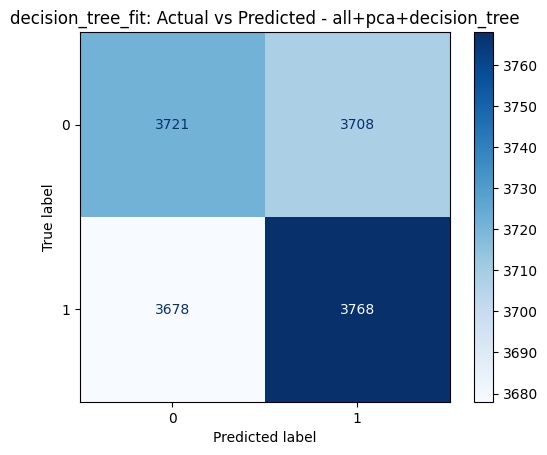

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


MSE: 0.010976786894759963


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


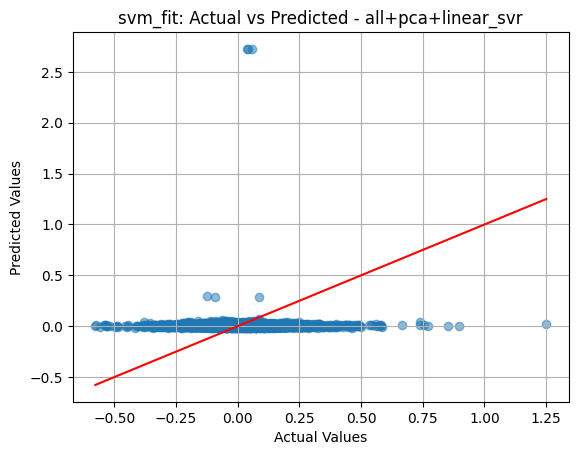

MSE: 0.009768474425987328


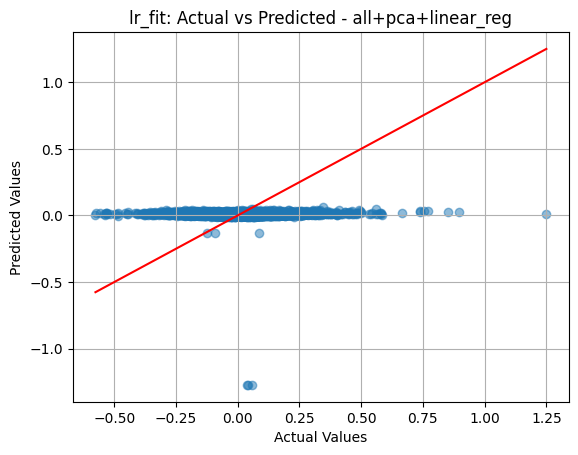

MSE: 0.009393121120305319


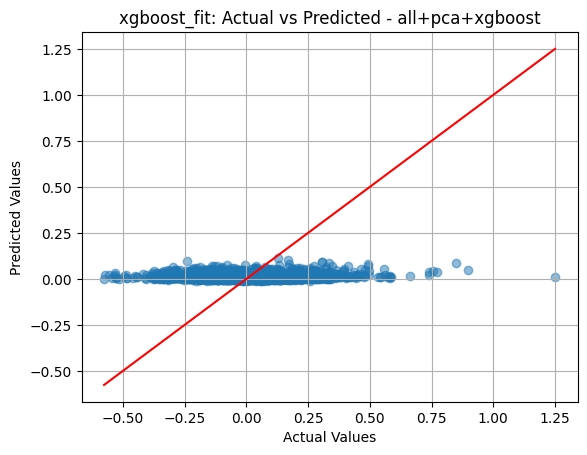

In [ ]:
# PCA method with reduced features 
sectors = list(pca_reduced_df['sector'].unique())+['all']
x_labels = [i for i in pca_reduced_df.columns if i not in (dr_obj.id_columns+dr_obj.ret_col+['ret_class', 'index'])]
for sector in sectors:
    if sector == 'all':
        sub_pca_reduced_df = pca_reduced_df
    else:
        sub_pca_reduced_df = pca_reduced_df.loc[pca_reduced_df.sector==sector]
    try:
        pca_reduced_df_x = sub_pca_reduced_df[x_labels]
        pca_reduced_df_y_dis = sub_pca_reduced_df['ret_class']
        pca_reduced_df_y_cont = sub_pca_reduced_df['ret_exc_lead1m']
        dr_obj.random_forest_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_dis, title_suffix=f'{sector}+pca+random_forest')
        dr_obj.decision_tree_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_dis, title_suffix=f'{sector}+pca+decision_tree')
        dr_obj.svm_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_cont, title_suffix=f'{sector}+pca+linear_svr')
        dr_obj.lr_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_cont, title_suffix=f'{sector}+pca+linear_reg')
        dr_obj.xgboost_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_cont, title_suffix=f'{sector}+pca+xgboost')
    except Exception as e:
        print(e)


              precision    recall  f1-score   support

           2       0.49      0.58      0.53       818
           3       0.49      0.41      0.44       817

    accuracy                           0.49      1635
   macro avg       0.49      0.49      0.49      1635
weighted avg       0.49      0.49      0.49      1635



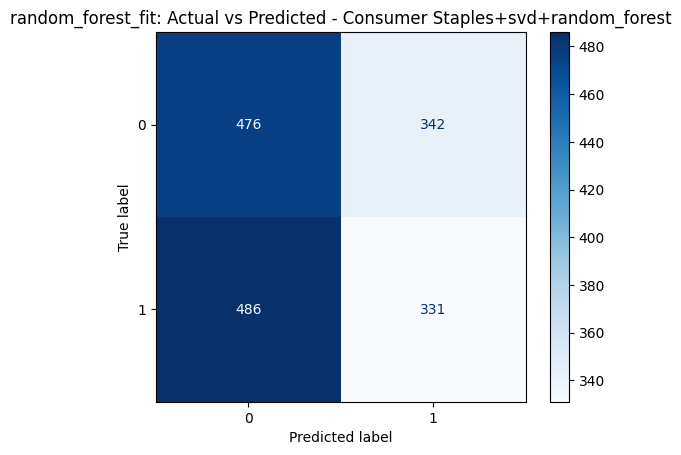

              precision    recall  f1-score   support

           2       0.49      0.48      0.49       818
           3       0.49      0.51      0.50       817

    accuracy                           0.49      1635
   macro avg       0.49      0.49      0.49      1635
weighted avg       0.49      0.49      0.49      1635



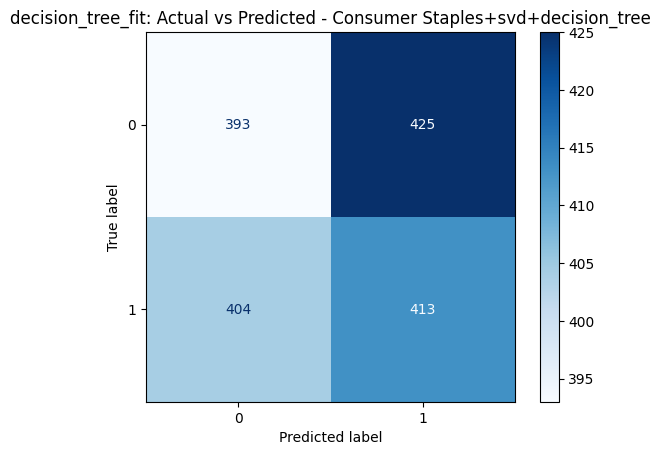

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MSE: 0.008187852447001757


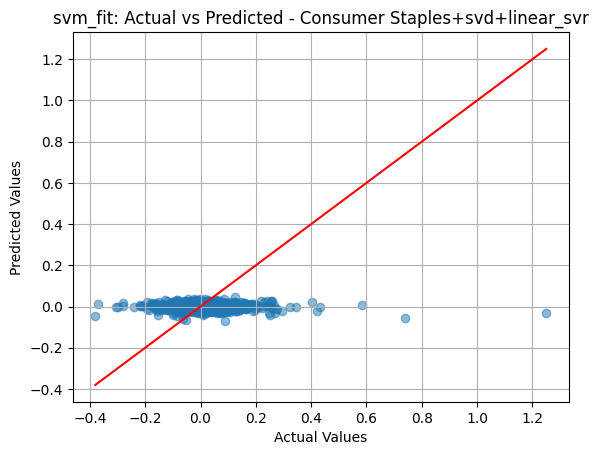

MSE: 0.007927469567370468


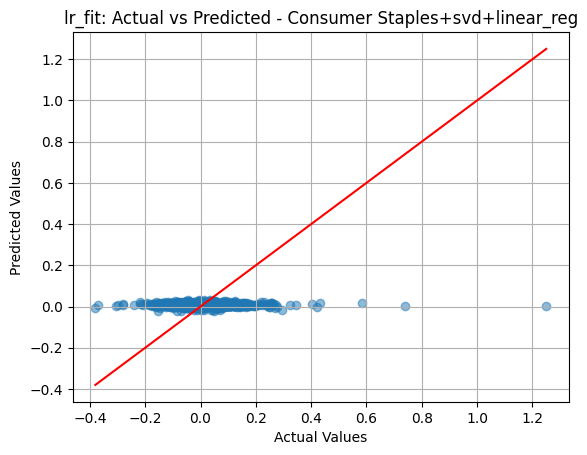

MSE: 0.007870242466433516


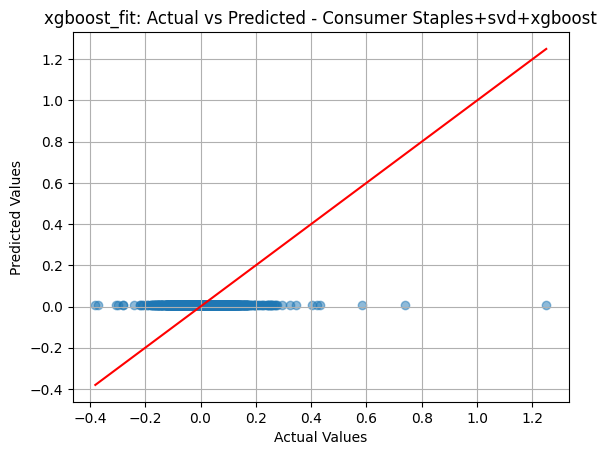

              precision    recall  f1-score   support

           2       0.53      0.51      0.52      2006
           3       0.49      0.50      0.49      1857

    accuracy                           0.51      3863
   macro avg       0.51      0.51      0.51      3863
weighted avg       0.51      0.51      0.51      3863



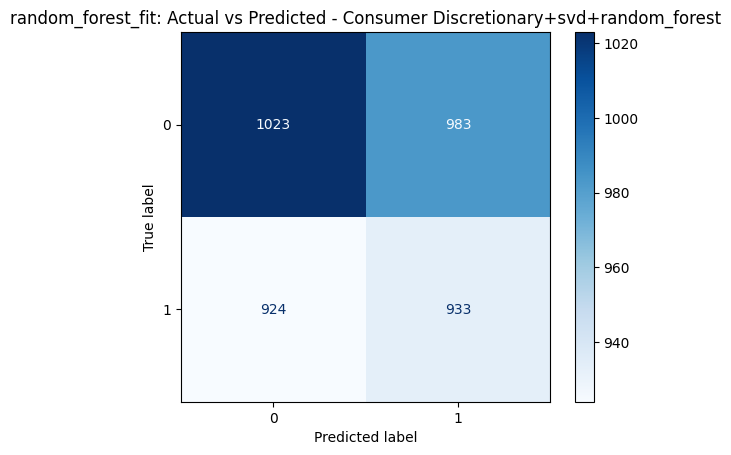

              precision    recall  f1-score   support

           2       0.52      0.45      0.48      2006
           3       0.48      0.56      0.52      1857

    accuracy                           0.50      3863
   macro avg       0.50      0.50      0.50      3863
weighted avg       0.50      0.50      0.50      3863



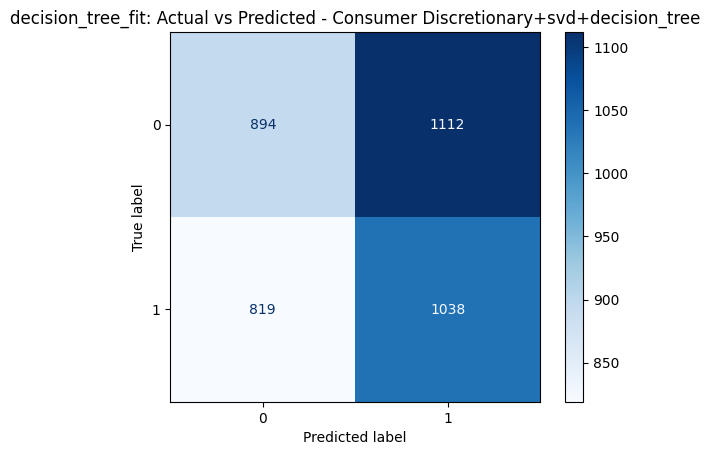

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


MSE: 0.01617713908719152


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


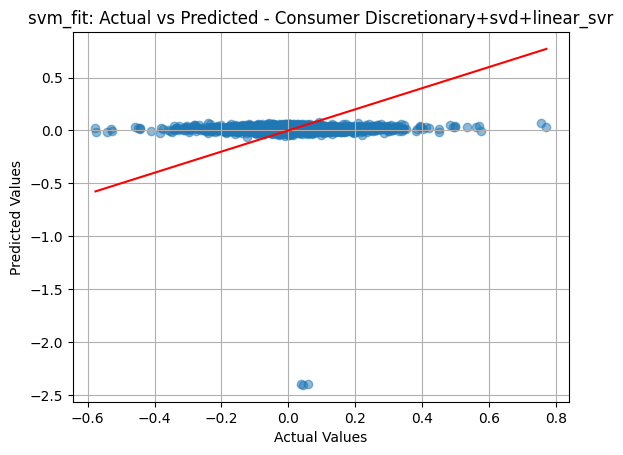

MSE: 0.024495237523910043


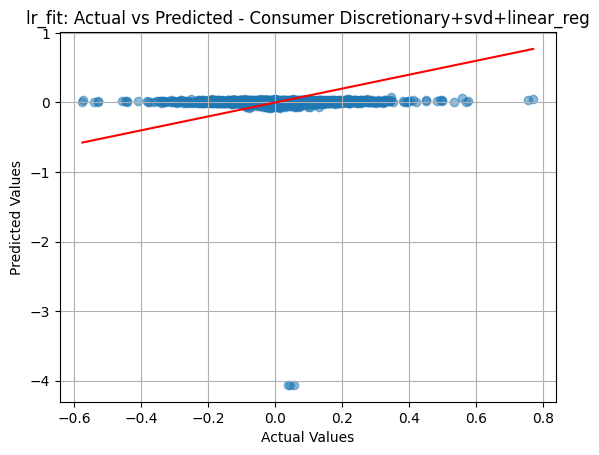

MSE: 0.011324365383504167


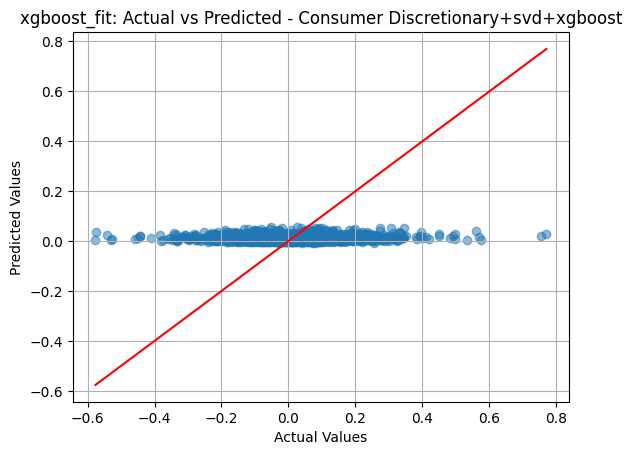

              precision    recall  f1-score   support

           2       0.54      0.54      0.54       855
           3       0.48      0.47      0.47       759

    accuracy                           0.51      1614
   macro avg       0.51      0.51      0.51      1614
weighted avg       0.51      0.51      0.51      1614



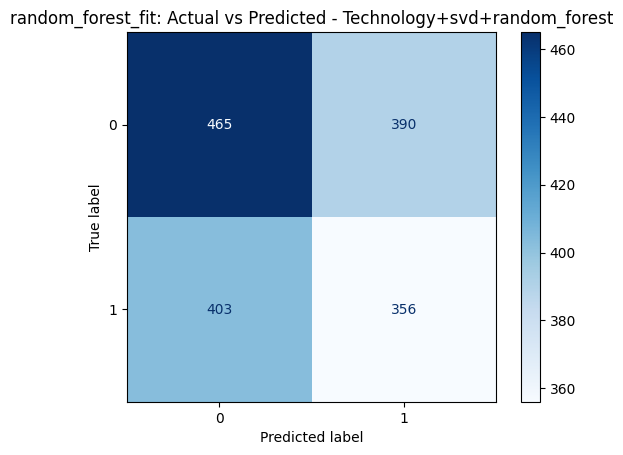

              precision    recall  f1-score   support

           2       0.54      0.55      0.54       855
           3       0.48      0.47      0.48       759

    accuracy                           0.51      1614
   macro avg       0.51      0.51      0.51      1614
weighted avg       0.51      0.51      0.51      1614



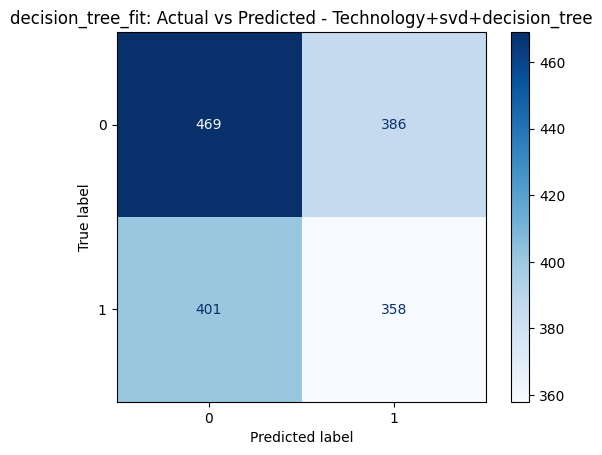

MSE: 0.013165011366977385


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


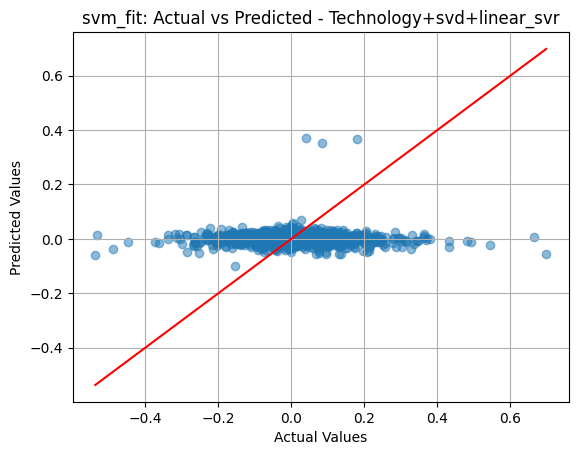

MSE: 0.013254479238237452


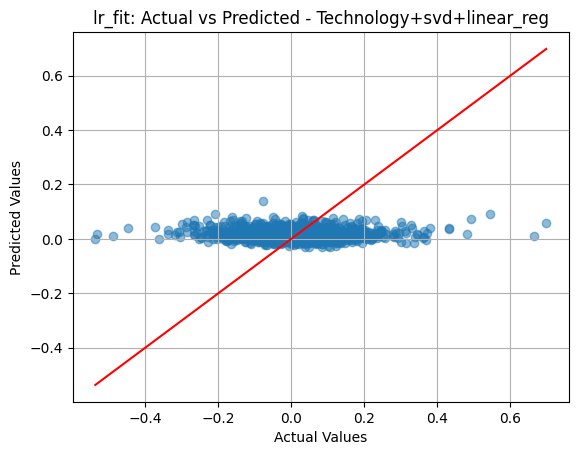

MSE: 0.012792458829696613


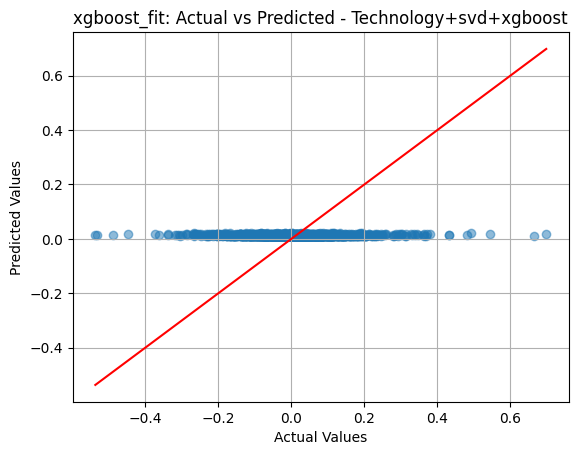

              precision    recall  f1-score   support

           2       0.49      0.73      0.59       256
           3       0.54      0.30      0.38       272

    accuracy                           0.51       528
   macro avg       0.51      0.51      0.49       528
weighted avg       0.52      0.51      0.48       528



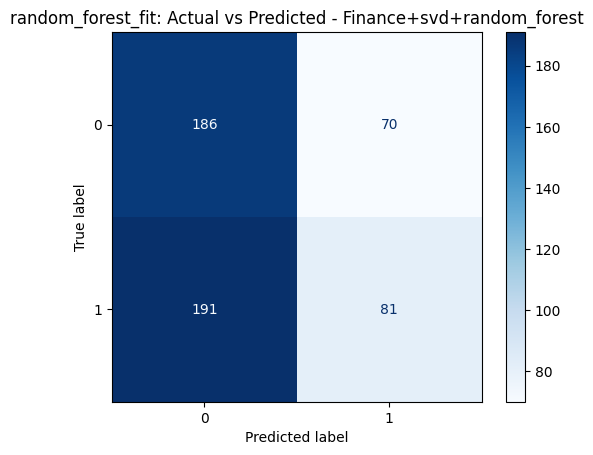

              precision    recall  f1-score   support

           2       0.51      0.55      0.53       256
           3       0.55      0.51      0.53       272

    accuracy                           0.53       528
   macro avg       0.53      0.53      0.53       528
weighted avg       0.53      0.53      0.53       528



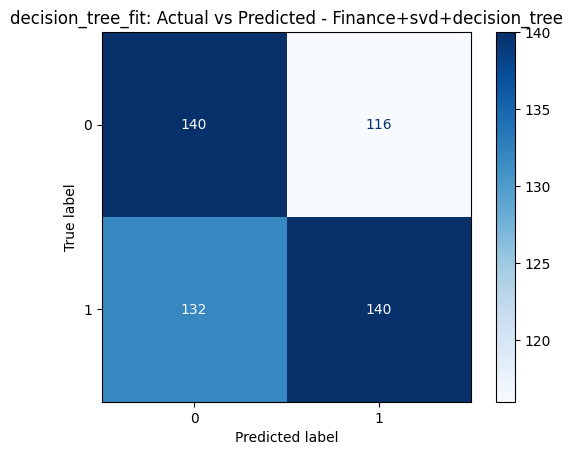

MSE: 0.010736430479176636


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


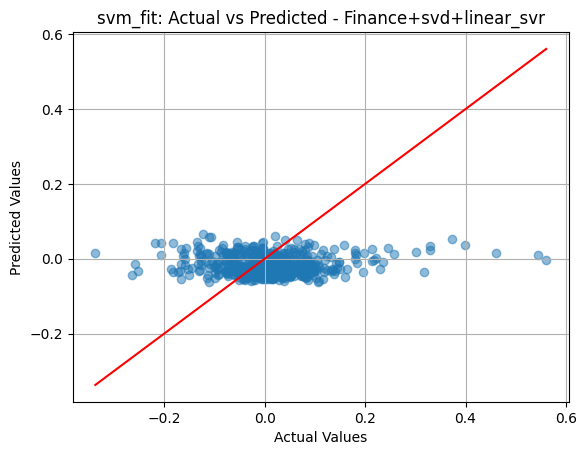

MSE: 0.0111832827935762


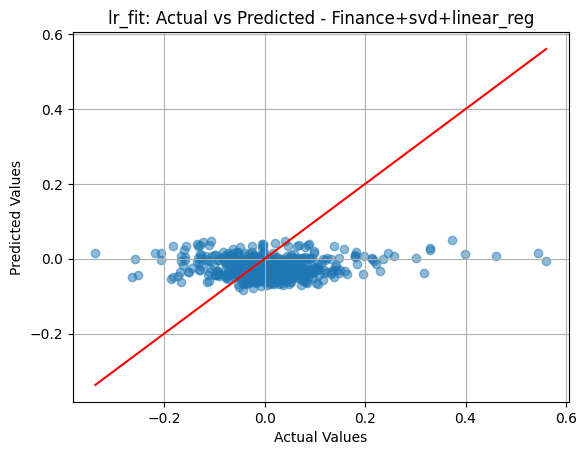

MSE: 0.009402009231268271


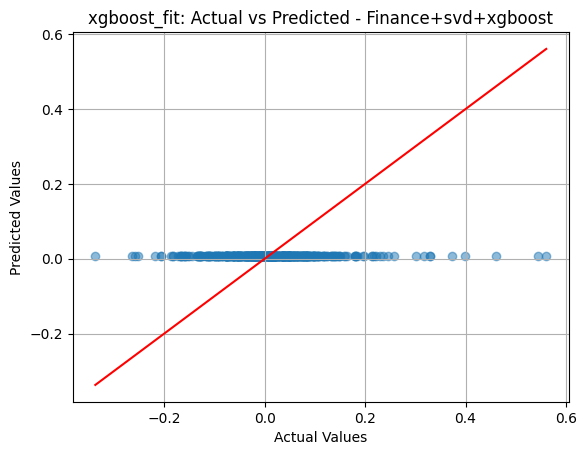

              precision    recall  f1-score   support

           2       0.51      0.58      0.54      1657
           3       0.55      0.48      0.51      1768

    accuracy                           0.53      3425
   macro avg       0.53      0.53      0.53      3425
weighted avg       0.53      0.53      0.53      3425



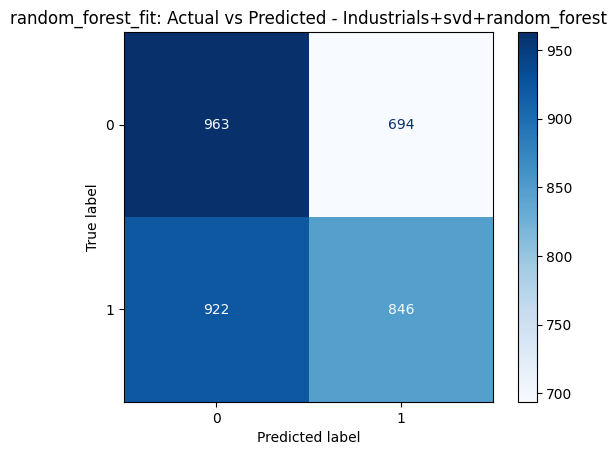

              precision    recall  f1-score   support

           2       0.48      0.50      0.49      1657
           3       0.52      0.50      0.51      1768

    accuracy                           0.50      3425
   macro avg       0.50      0.50      0.50      3425
weighted avg       0.50      0.50      0.50      3425



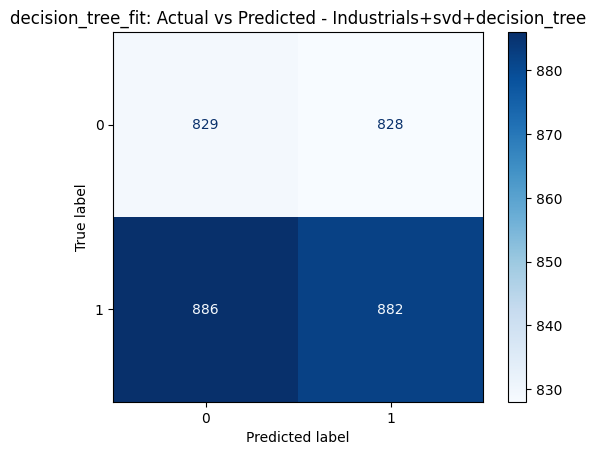

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


MSE: 0.00900488220335014


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


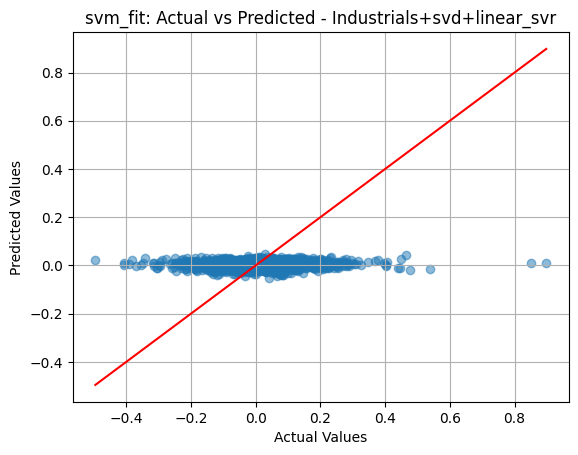

MSE: 0.008890383510740976


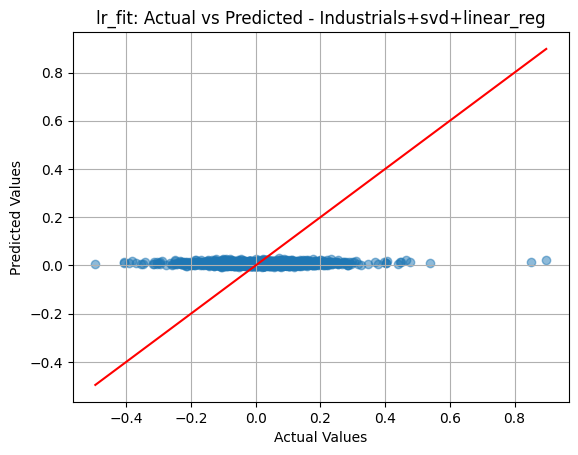

MSE: 0.008890921276643584


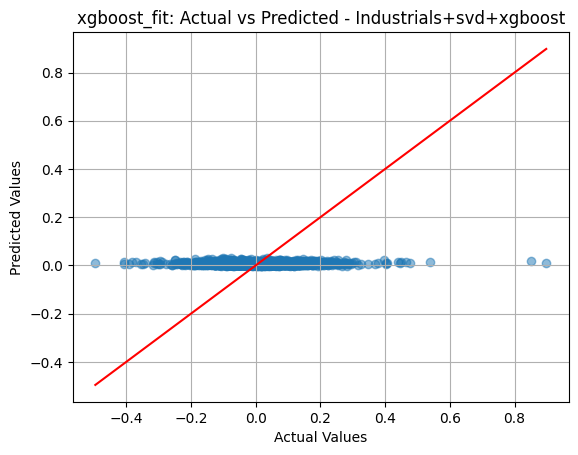

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.49      0.39      0.43       736
           3       0.52      0.62      0.56       780

    accuracy                           0.50      1517
   macro avg       0.33      0.33      0.33      1517
weighted avg       0.50      0.50      0.50      1517



/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

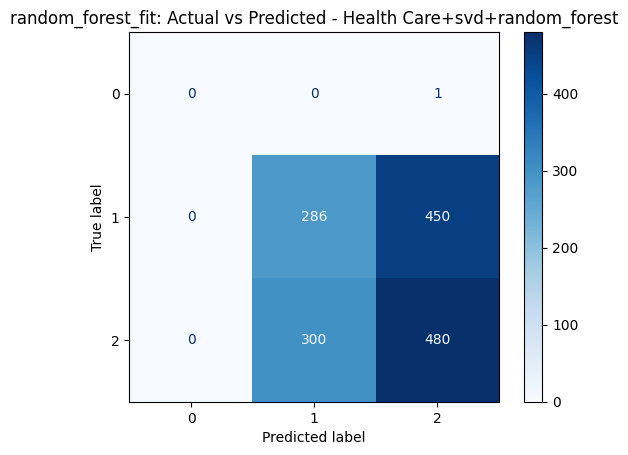

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.49      0.55      0.52       736
           3       0.52      0.47      0.49       780

    accuracy                           0.51      1517
   macro avg       0.34      0.34      0.34      1517
weighted avg       0.51      0.51      0.51      1517



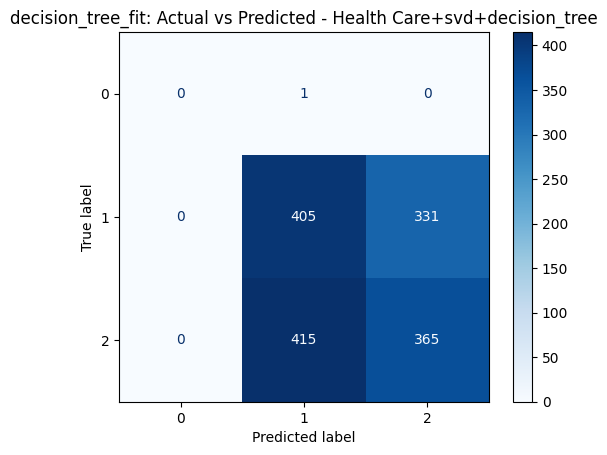

/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MSE: 0.009209096126517564


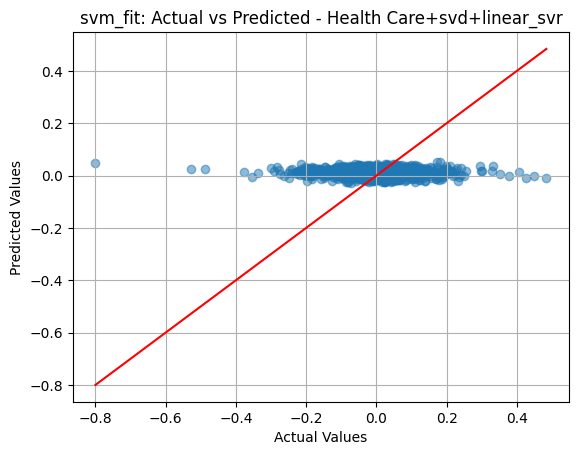

MSE: 0.00892901224072023


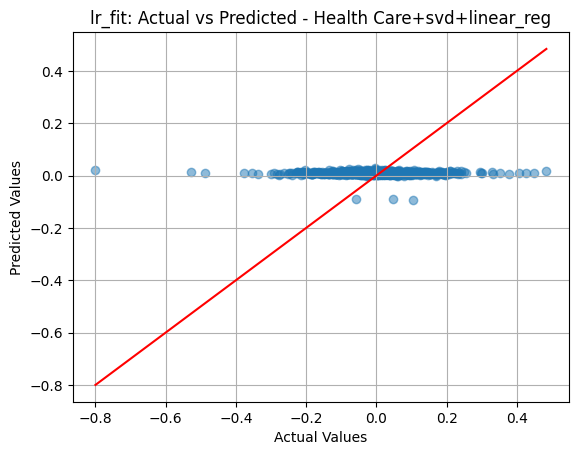

MSE: 0.008880242233090679


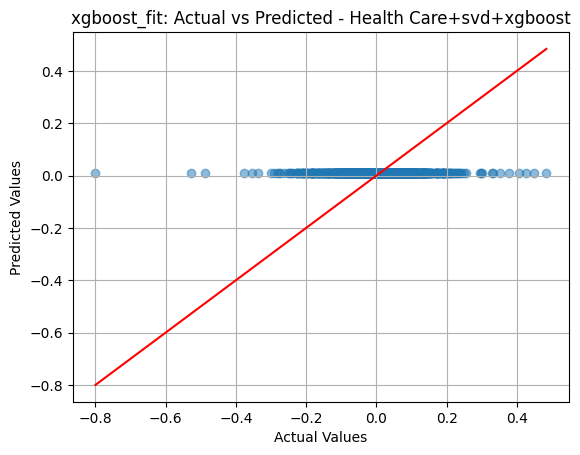

              precision    recall  f1-score   support

           2       0.54      0.38      0.44        40
           3       0.46      0.62      0.53        34

    accuracy                           0.49        74
   macro avg       0.50      0.50      0.48        74
weighted avg       0.50      0.49      0.48        74



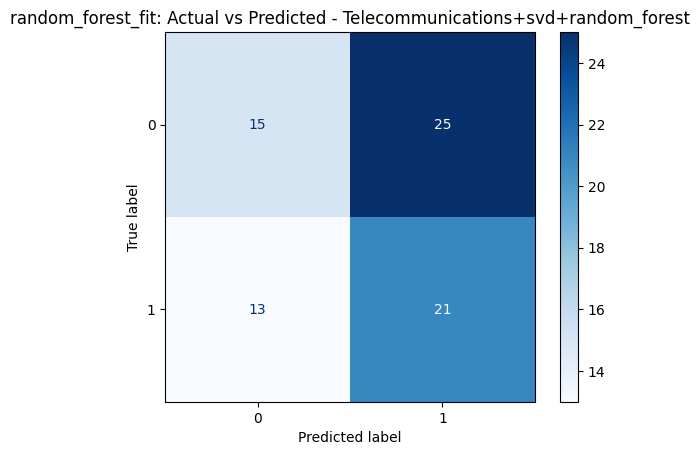

              precision    recall  f1-score   support

           2       0.66      0.53      0.58        40
           3       0.55      0.68      0.61        34

    accuracy                           0.59        74
   macro avg       0.60      0.60      0.59        74
weighted avg       0.61      0.59      0.59        74



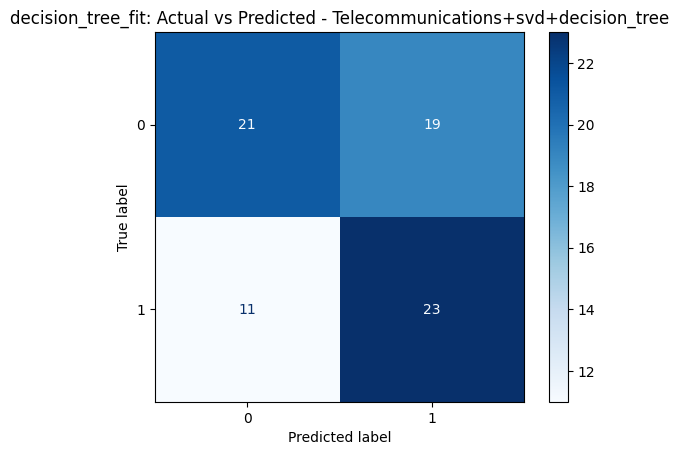

MSE: 0.00971465820490183


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


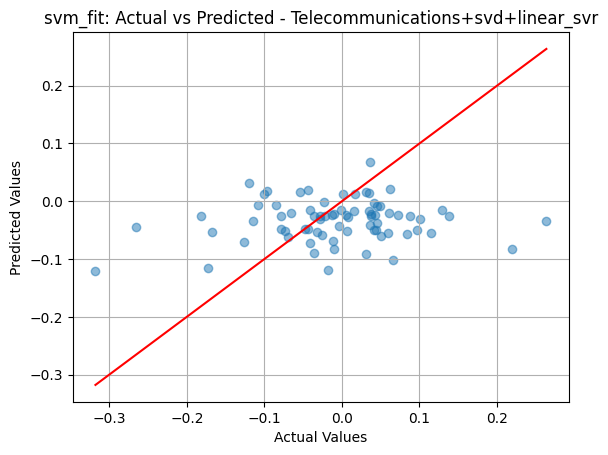

MSE: 0.009053642449626236


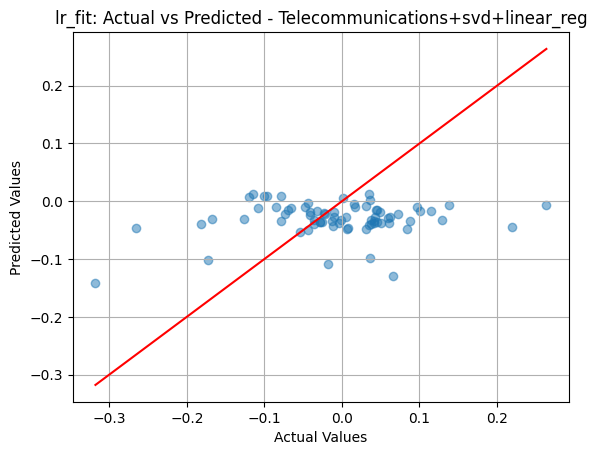

MSE: 0.00880543736148269


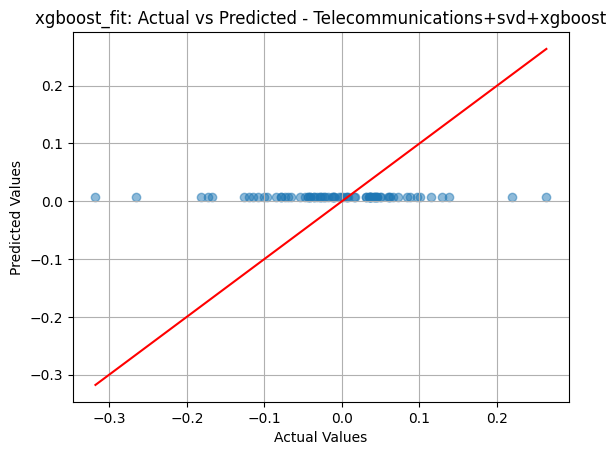

              precision    recall  f1-score   support

           2       0.49      0.51      0.50       119
           3       0.50      0.48      0.49       122

    accuracy                           0.50       241
   macro avg       0.50      0.50      0.50       241
weighted avg       0.50      0.50      0.50       241



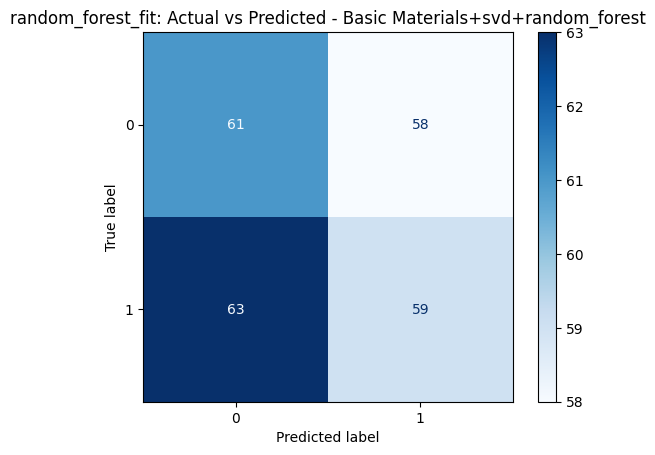

              precision    recall  f1-score   support

           2       0.51      0.78      0.61       119
           3       0.54      0.25      0.35       122

    accuracy                           0.51       241
   macro avg       0.52      0.52      0.48       241
weighted avg       0.52      0.51      0.48       241



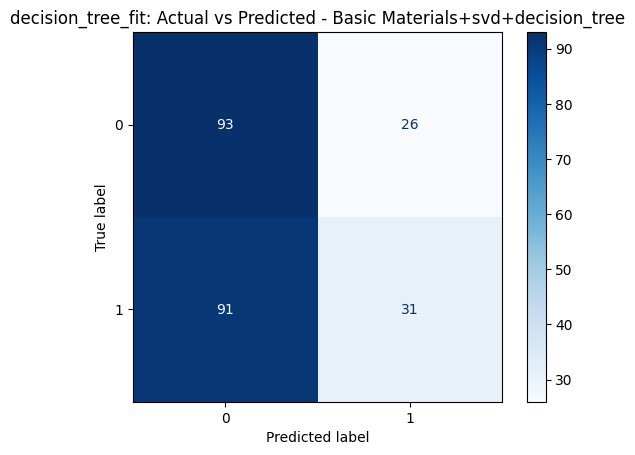

MSE: 0.013914770079220457


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


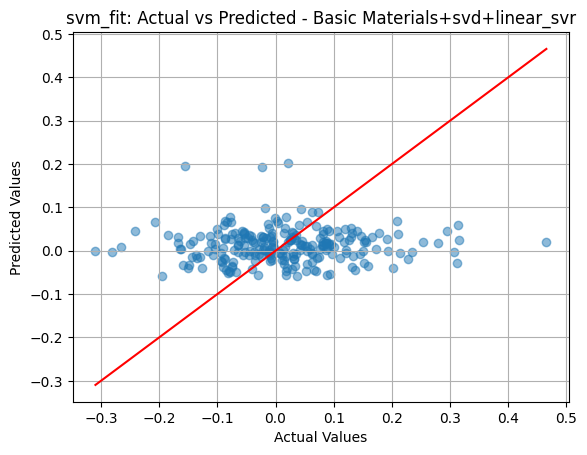

MSE: 0.01978243121061224


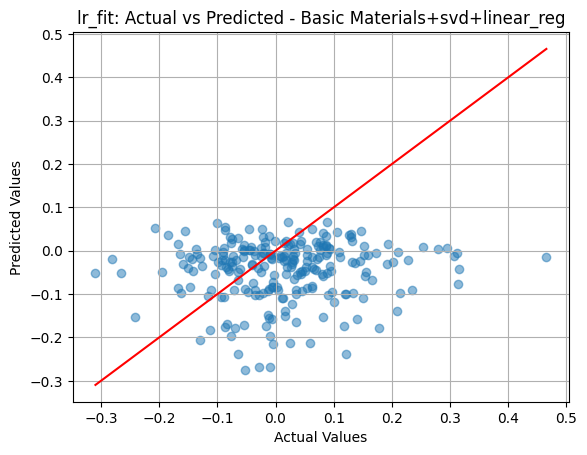

MSE: 0.012644822909101797


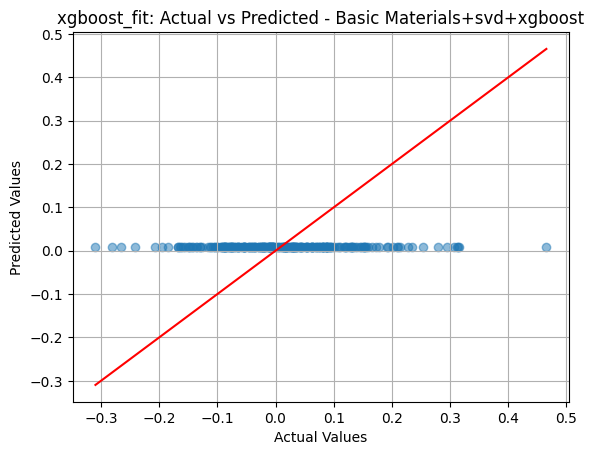

              precision    recall  f1-score   support

           2       0.49      0.58      0.53       514
           3       0.54      0.45      0.49       565

    accuracy                           0.51      1079
   macro avg       0.52      0.51      0.51      1079
weighted avg       0.52      0.51      0.51      1079



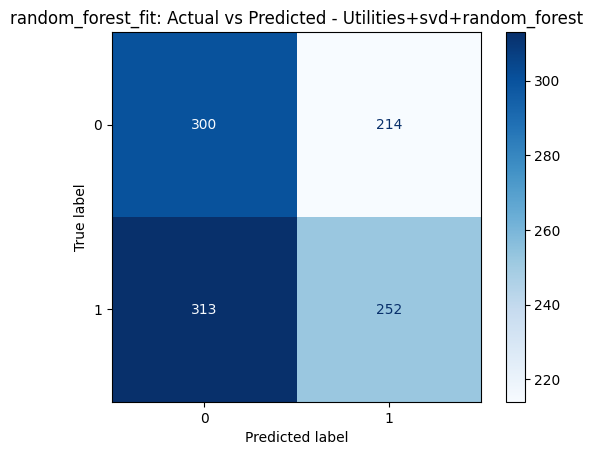

              precision    recall  f1-score   support

           2       0.47      0.51      0.49       514
           3       0.52      0.48      0.50       565

    accuracy                           0.49      1079
   macro avg       0.49      0.49      0.49      1079
weighted avg       0.49      0.49      0.49      1079



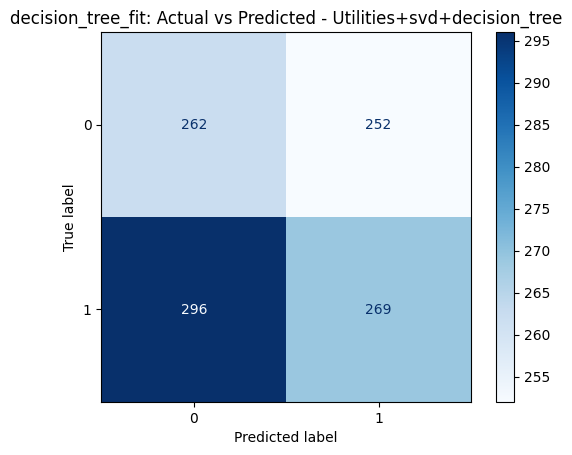

MSE: 0.003988675937445804


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


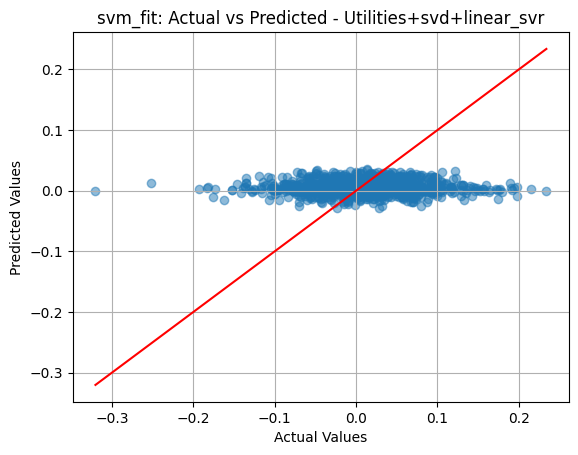

MSE: 0.003909097949488528


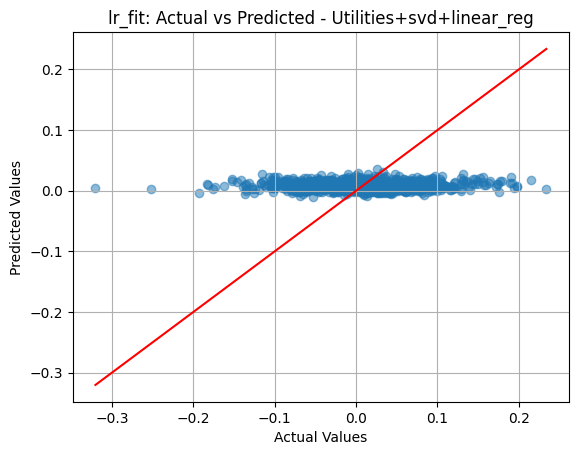

MSE: 0.0039005571759491583


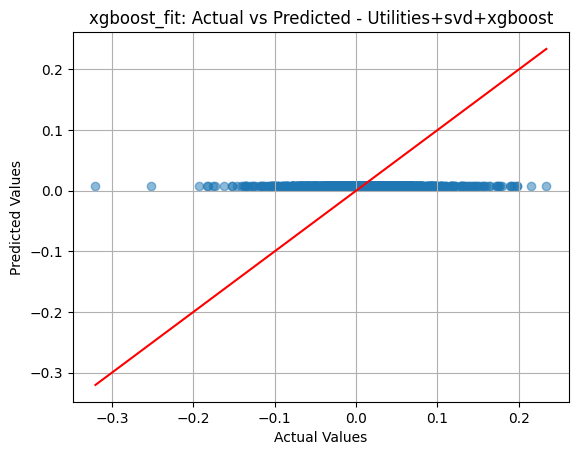

              precision    recall  f1-score   support

           2       0.18      0.12      0.14        26
           3       0.53      0.65      0.58        40

    accuracy                           0.44        66
   macro avg       0.35      0.38      0.36        66
weighted avg       0.39      0.44      0.41        66



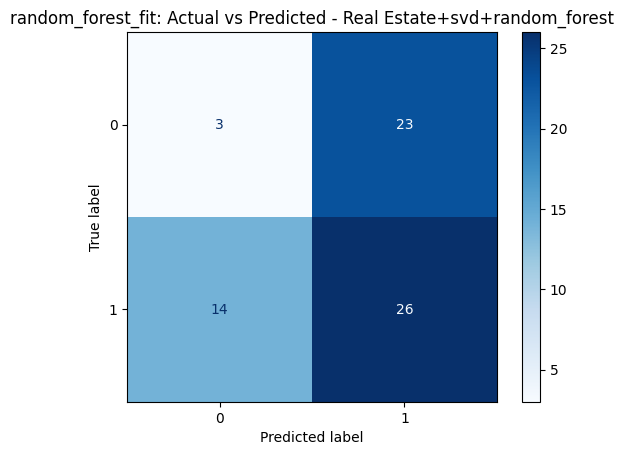

              precision    recall  f1-score   support

           2       0.37      0.42      0.39        26
           3       0.58      0.53      0.55        40

    accuracy                           0.48        66
   macro avg       0.47      0.47      0.47        66
weighted avg       0.50      0.48      0.49        66



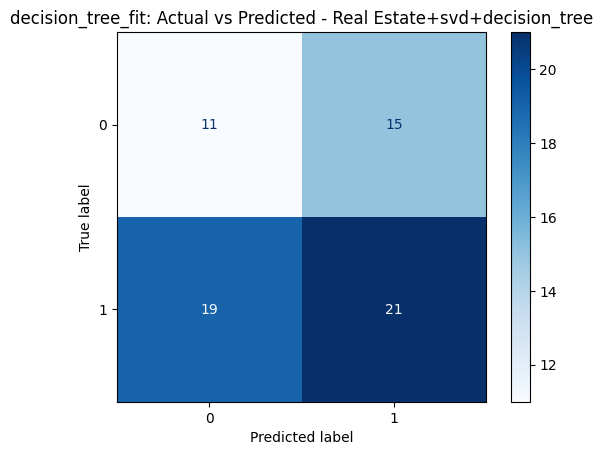

MSE: 0.00680574456338497


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


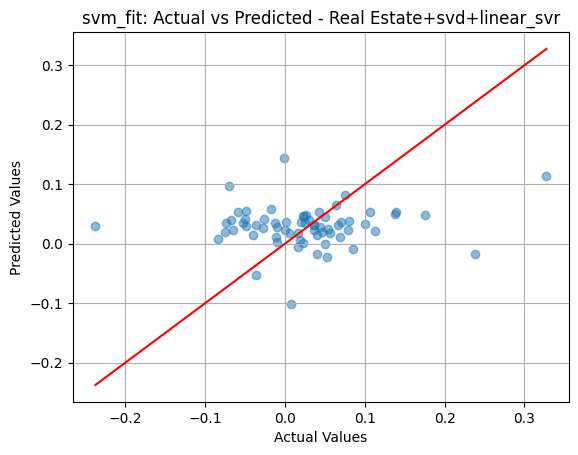

MSE: 0.011430712873036302


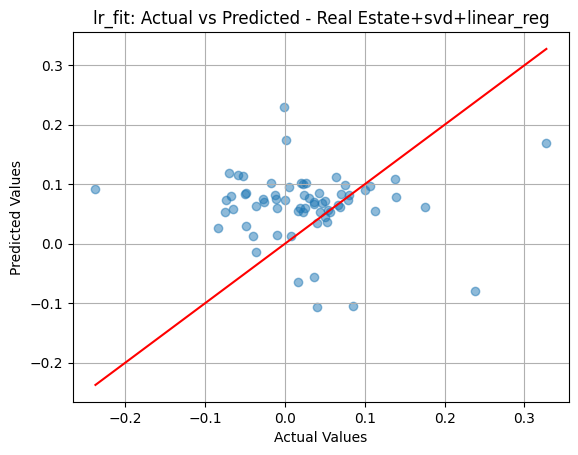

MSE: 0.006319814699911507


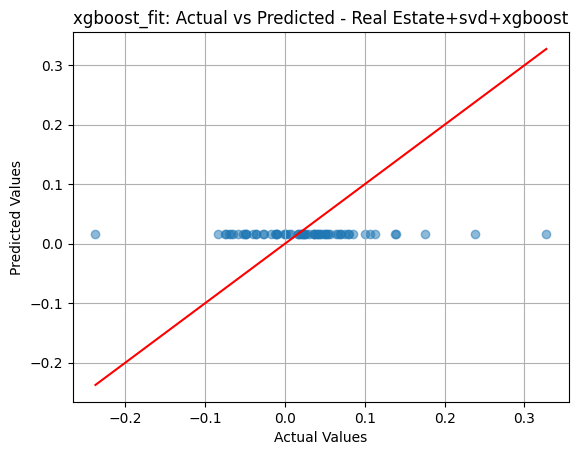

              precision    recall  f1-score   support

           2       0.50      0.49      0.50       410
           3       0.50      0.52      0.51       410

    accuracy                           0.50       820
   macro avg       0.50      0.50      0.50       820
weighted avg       0.50      0.50      0.50       820



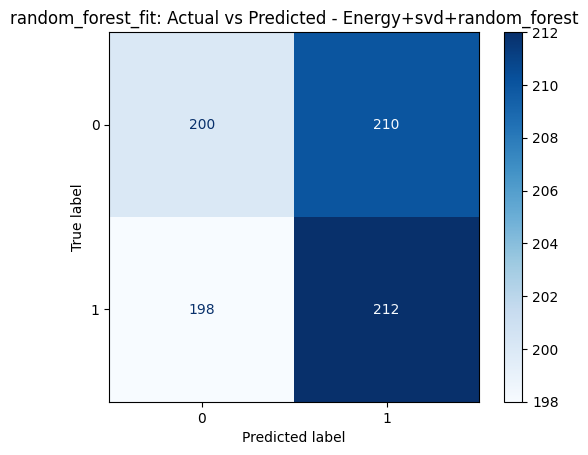

              precision    recall  f1-score   support

           2       0.50      0.43      0.46       410
           3       0.50      0.57      0.53       410

    accuracy                           0.50       820
   macro avg       0.50      0.50      0.50       820
weighted avg       0.50      0.50      0.50       820



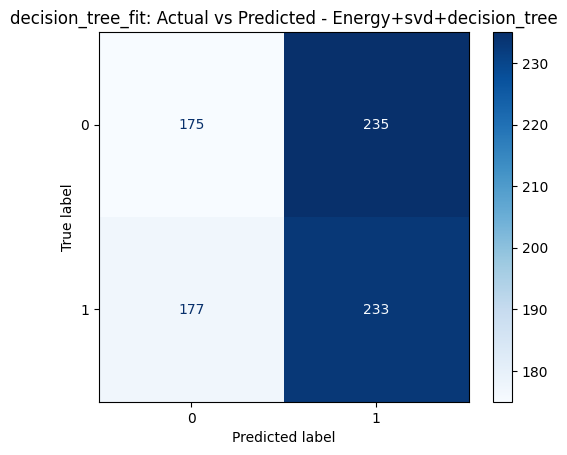

MSE: 0.013802048814957753


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


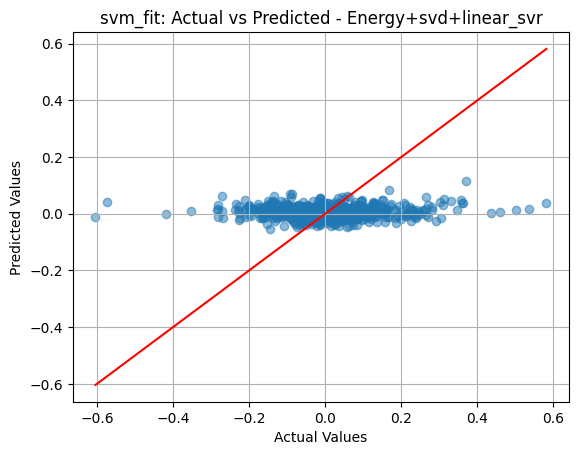

MSE: 0.013691834754629246


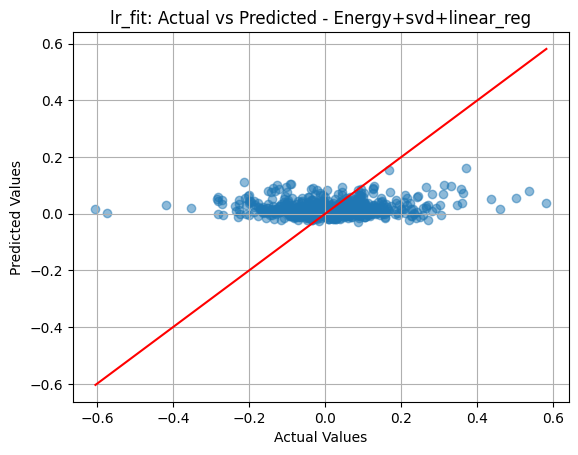

MSE: 0.013639067389168898


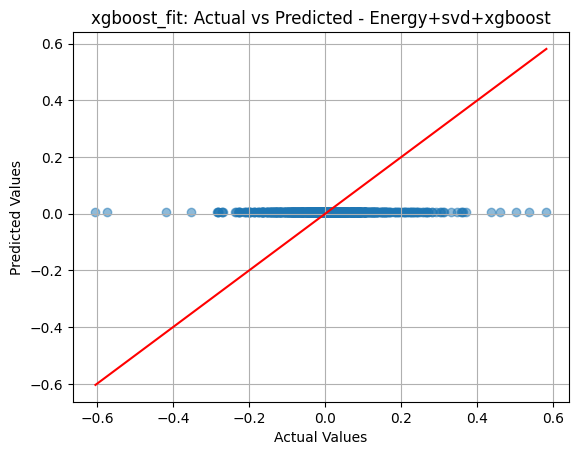

              precision    recall  f1-score   support

           2       0.71      0.50      0.59        10
           3       0.55      0.75      0.63         8

    accuracy                           0.61        18
   macro avg       0.63      0.62      0.61        18
weighted avg       0.64      0.61      0.61        18



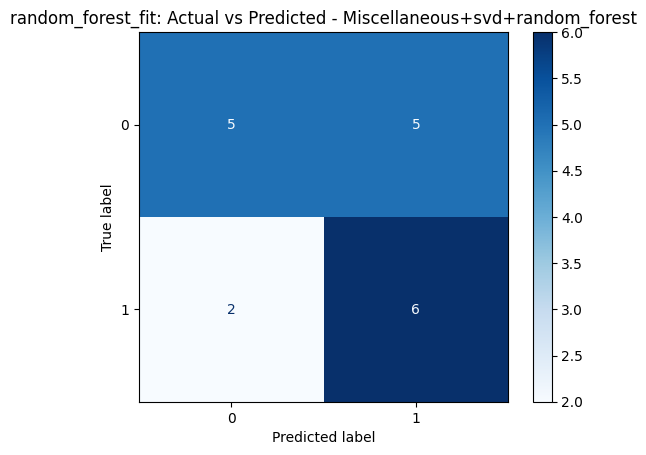

              precision    recall  f1-score   support

           2       0.67      0.20      0.31        10
           3       0.47      0.88      0.61         8

    accuracy                           0.50        18
   macro avg       0.57      0.54      0.46        18
weighted avg       0.58      0.50      0.44        18



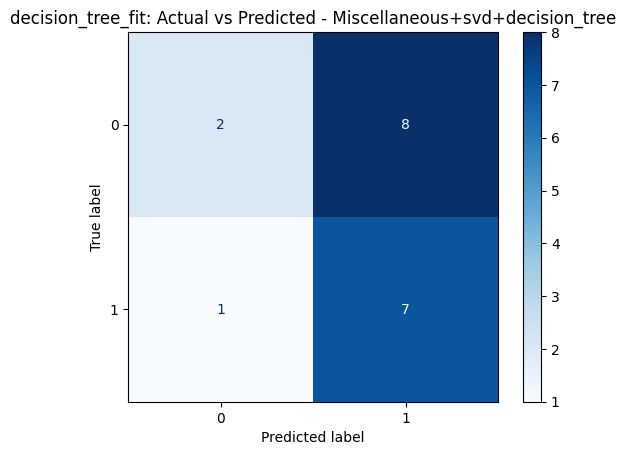

MSE: 0.14697972527341419


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


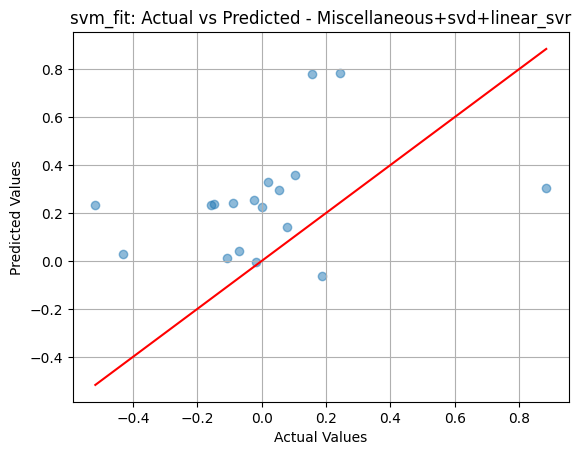

MSE: 0.17969799955876212


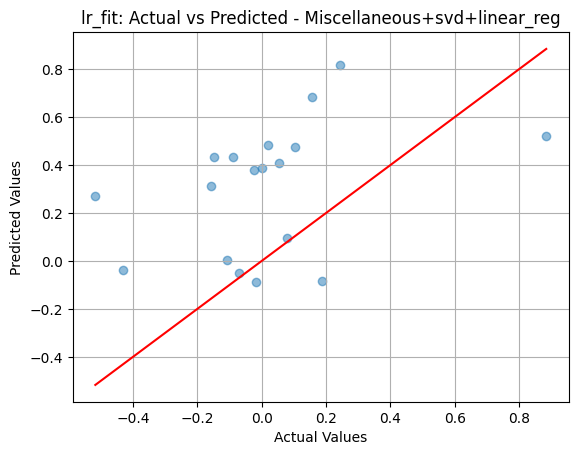

MSE: 0.08063328349802598


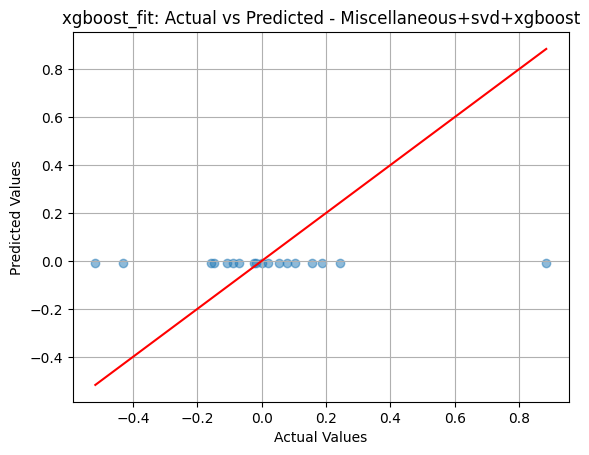

              precision    recall  f1-score   support

           2       0.71      0.50      0.59        10
           3       0.55      0.75      0.63         8

    accuracy                           0.61        18
   macro avg       0.63      0.62      0.61        18
weighted avg       0.64      0.61      0.61        18



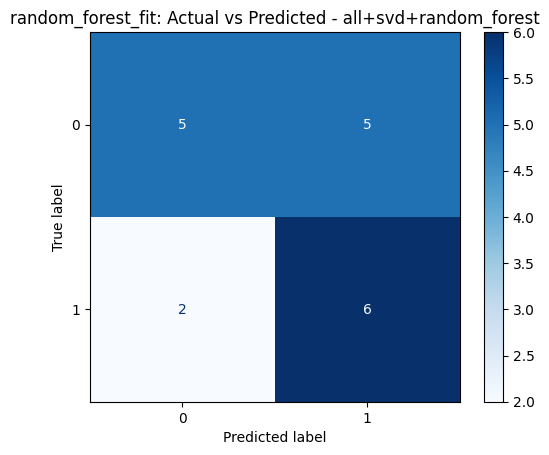

              precision    recall  f1-score   support

           2       0.67      0.20      0.31        10
           3       0.47      0.88      0.61         8

    accuracy                           0.50        18
   macro avg       0.57      0.54      0.46        18
weighted avg       0.58      0.50      0.44        18



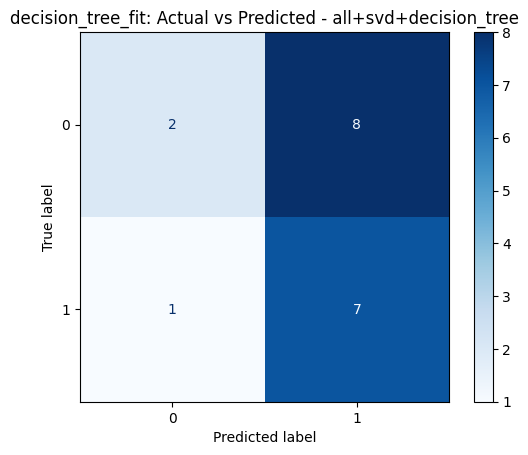

MSE: 0.15235562389910062


/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pengjin/Desktop/ml_project/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


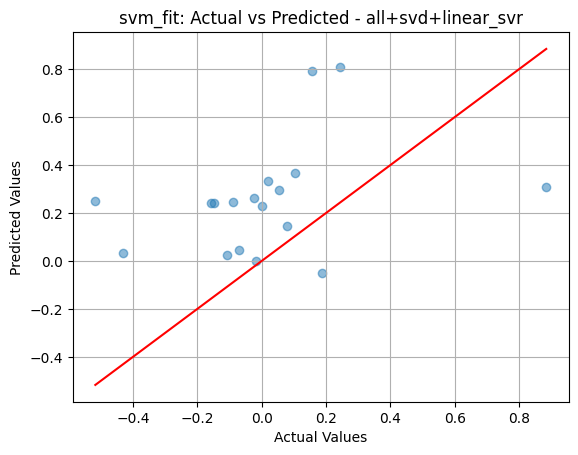

MSE: 0.17969799955876212


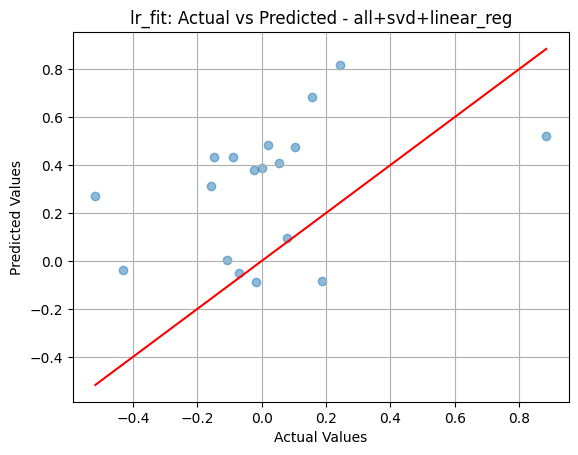

MSE: 0.08063328349802598


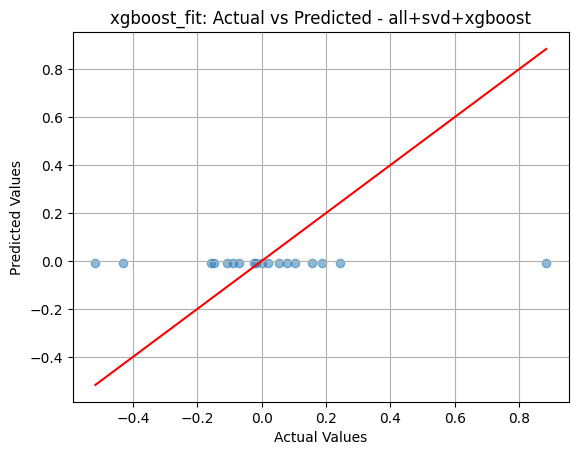

In [ ]:
# SVD method with reduced features 
sectors = list(svd_reduced_df['sector'].unique())+['all']
x_labels = [i for i in svd_reduced_df.columns if i not in (dr_obj.id_columns+dr_obj.ret_col+['ret_class', 'index'])]
for sector in sectors:
    if sector == 'all':
        sub_svd_reduced_df = svd_reduced_df
    else:
        sub_pca_reduced_df = pca_reduced_df.loc[pca_reduced_df.sector==sector]
    pca_reduced_df_x = sub_pca_reduced_df[x_labels]
    pca_reduced_df_y_dis = sub_pca_reduced_df['ret_class']
    pca_reduced_df_y_cont = sub_pca_reduced_df['ret_exc_lead1m']
    dr_obj.random_forest_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_dis, title_suffix=f'{sector}+svd+random_forest')
    dr_obj.decision_tree_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_dis, title_suffix=f'{sector}+svd+decision_tree')
    dr_obj.svm_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_cont, title_suffix=f'{sector}+svd+linear_svr')
    dr_obj.lr_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_cont, title_suffix=f'{sector}+svd+linear_reg')
    dr_obj.xgboost_fit(x_data=pca_reduced_df_x, y_data=pca_reduced_df_y_cont, title_suffix=f'{sector}+svd+xgboost')
